In [1]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from tqdm import tqdm
import matplotlib.pylab as pl
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
mpl.rcParams['figure.dpi']=300

plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 16,
    "font.family": "serif",
    "font.serif": 'cm10',
    'savefig.bbox' : 'tight'})

from utils.array import array_pattern,get_lobes_positions

C:\Users\PC-MAI~1\AppData\Local\Temp/ipykernel_19556/1996030649.py:8: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


## 9.

Assume an M=101 element array with d = λ/2. To make a thinned (or sparse) array with N=25 elements without limiting the aperture size (i.e. keeping the outer elements), and where the element positions are drawn from a uniform distribution, the following code can be used:
NEls = 101;
NPos = 25;
pos = [];
while length(pos)<NPos - 2
  pos = unique(ceil((NEls-2)*rand(1,NPos*2)),’stable’);
end
ElPos = [-(NEls-1)/2  sort(pos(1:NPos-2))-(NEls-1)/2 (NEls-1)/2]*d

 The upper figure gives an indication of how the mainlobe width and the heights of the side- lobes varie. The lower figure indicates the variation in the element positions (which is uniform in this case).
Utilizing the code given above, estimate the mainlobe width (mean and standard variation), the mean sidelobe level, and the maximum sidelobe level for larg collection of thinned array realizations. Compare your result to a dense array (all elements active) and one or a few of "the optimal" arrays found in J. F. Hopperstad and S. Holm,"Optimization of sparse arrays by an improved simulated annealing algorithm", Proc. Int. Workshop on Sampling Theory and Applications, pp. 91-95, Loen, Norway, August 1999 available at https://www.researchgate.net/ publication/228643183_Optimization_of_sparse_arrays_by_an_improved_simulated_annealing_ algorithm.

Redo the analysis with the number of active elements equal to N=50 and N=75 and comment on how the mainlobe widths and sidelobe levels change when the number of active elements is increased.


In [22]:
NEls = 101

def get_ElPos(NPos):
    
    pos = []
    
    while len(pos) < NPos - 2 :

            pos = np.unique(np.ceil((NEls-2)*np.random.uniform(0,1,(1,NPos*2))))
    
   
    ElPos = np.zeros(NPos)
    
    np.random.shuffle(pos)
    

    ElPos[0]=-(NEls-1)/2
    ElPos[1:-2] = np.sort(pos[1:NPos-2])-(NEls-1)/2
    ElPos[-1]=(NEls-1)/2

    ElPos = ElPos*d
    
    return ElPos

def get_ElPos_normal(NPos,factor):
    
    pos = []
    
    while len(pos) < NPos - 2 :

            tmp = np.ceil((NEls/factor*np.random.normal(0,1,(1,NPos*2))))
            pos = np.unique(tmp[np.abs(tmp)<(NEls-1)/2])
   
    ElPos = np.zeros(NPos)
    
    np.random.shuffle(pos)
    

    ElPos[0]=-(NEls-1)/2
    ElPos[1:-2] = np.sort(pos[1:NPos-2])
    ElPos[-1]=(NEls-1)/2

    ElPos = ElPos*d
    
    return ElPos

## 25 active elements

100%|██████████| 20/20 [00:01<00:00, 14.35it/s]


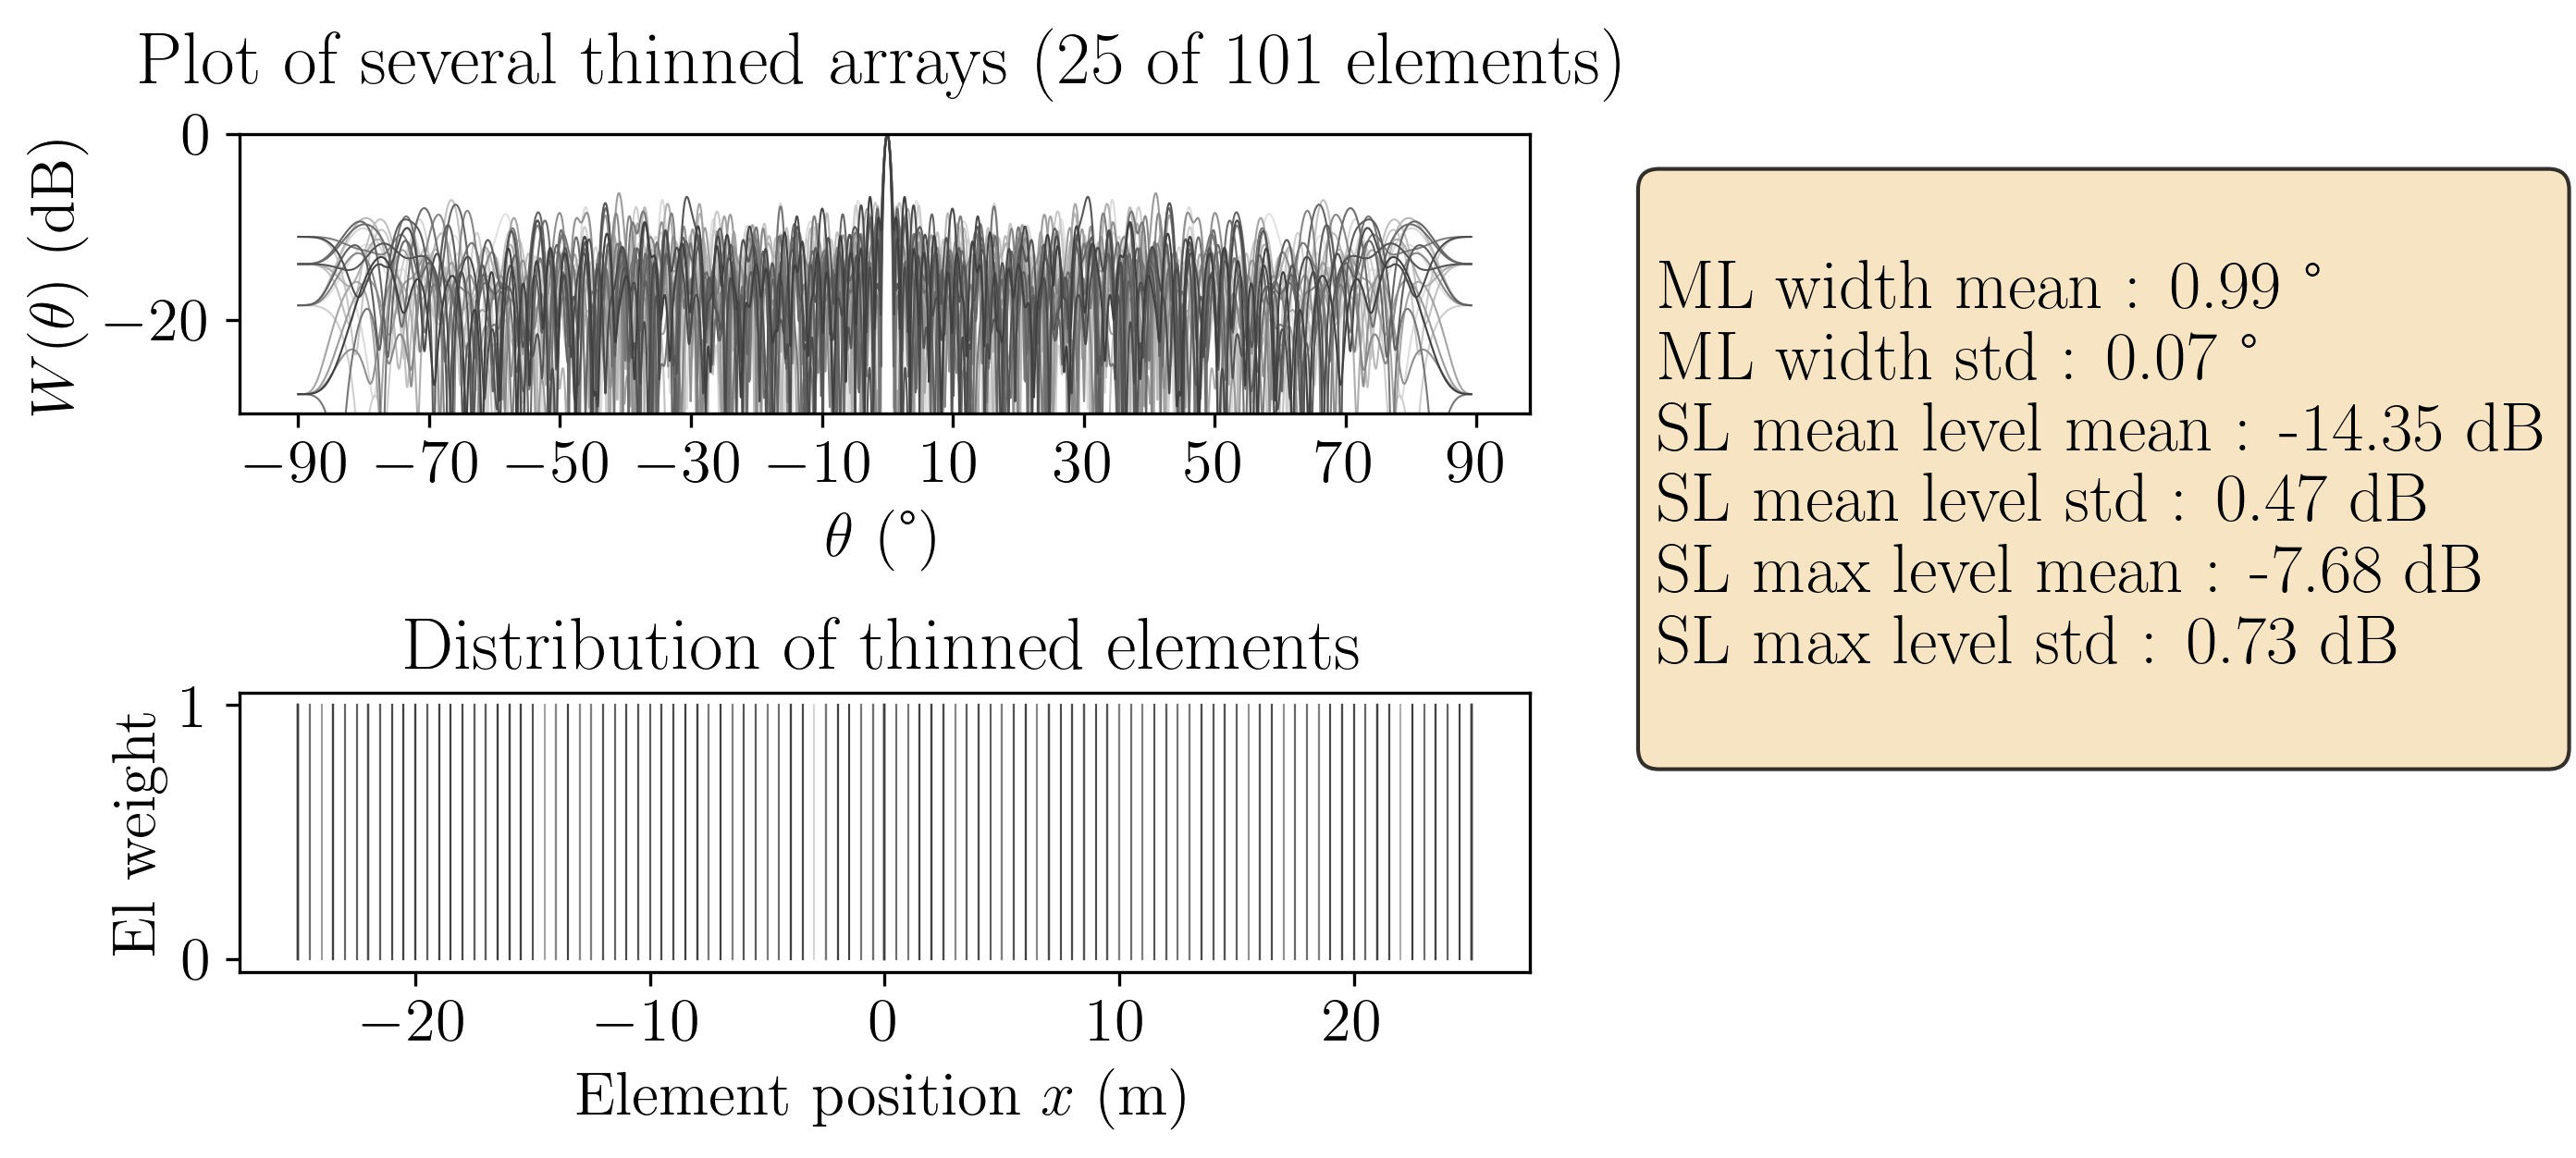

In [23]:
N = 20
M = 101
NPos = 25

colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
d = spacing
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    
    ElPos = get_ElPos(NPos)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M),y=1.1)
ax2.set_title('Distribution of thinned elements')

textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)

fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_unif_array_pattern_'+str(NPos)+'.png',dpi=300)

In [24]:
print('Main lobe width')
ML_width_mean = np.mean(ML_widths_list)
ML_width_std = np.std(ML_widths_list)
print('Mean : {:.2f} °'.format(ML_width_mean))
print('Std : {:.2f} °'.format(ML_width_std))

print('Side lobes mean level')
SL_mean_level_mean = np.mean(SL_mean_levels_list)
SL_mean_level_std = np.std(SL_mean_levels_list)
print('Mean : {:.2f} dB'.format(SL_mean_level_mean))
print('Std : {:.2f} dB'.format(SL_mean_level_std))

print('Side lobes max level')
SL_max_level_mean = np.mean(SL_max_levels_list)
SL_max_level_std = np.std(SL_max_levels_list)
print('Mean : {:.2f} dB'.format(SL_max_level_mean))
print('Std : {:.2f} dB'.format(SL_max_level_std))


Main lobe width
Mean : 0.99 °
Std : 0.07 °
Side lobes mean level
Mean : -14.35 dB
Std : 0.47 dB
Side lobes max level
Mean : -7.68 dB
Std : 0.73 dB


## 50 active elements

100%|██████████| 20/20 [00:02<00:00,  7.08it/s]


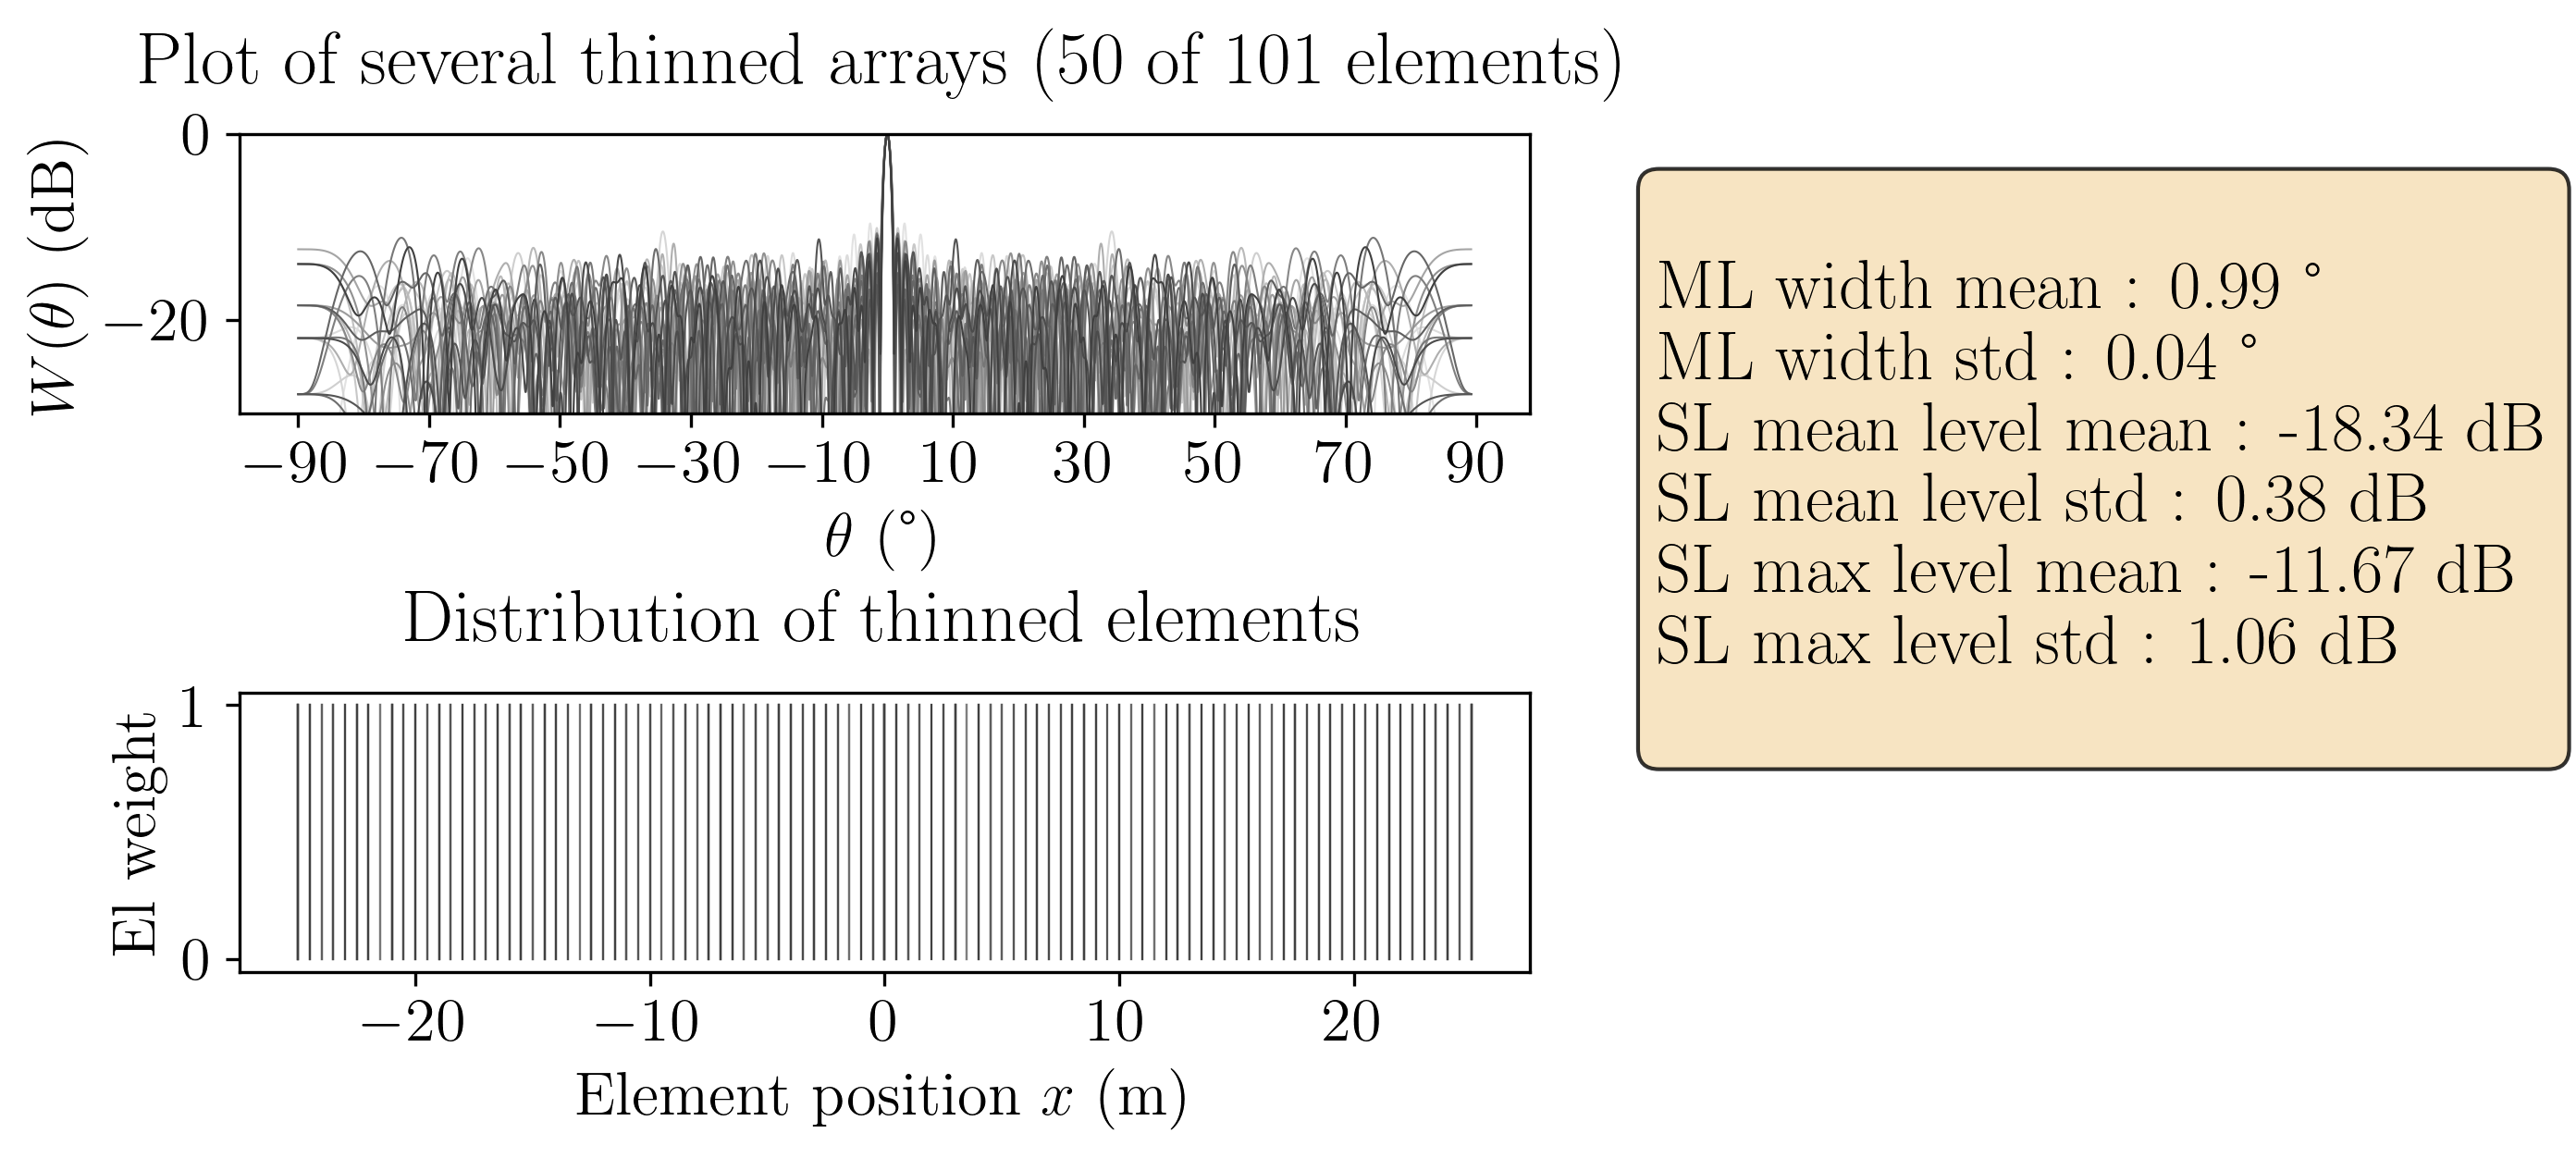

In [25]:
M = 101
NPos = 50
colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    ElPos = get_ElPos(NPos)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M),y=1.1)
ax2.set_title('Distribution of thinned elements',y=1.1)

textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)




fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_unif_array_pattern_'+str(NPos)+'.png',dpi=300)

In [26]:
print('Main lobe width')
ML_width_mean = np.mean(ML_widths_list)
ML_width_std = np.std(ML_widths_list)
print('Mean : {:.2f} °'.format(ML_width_mean))
print('Std : {:.2f} °'.format(ML_width_std))

print('Side lobes mean level')
SL_mean_level_mean = np.mean(SL_mean_levels_list)
SL_mean_level_std = np.std(SL_mean_levels_list)
print('Mean : {:.2f} dB'.format(SL_mean_level_mean))
print('Std : {:.2f} dB'.format(SL_mean_level_std))

print('Side lobes max level')
SL_max_level_mean = np.mean(SL_max_levels_list)
SL_max_level_std = np.std(SL_max_levels_list)
print('Mean : {:.2f} dB'.format(SL_max_level_mean))
print('Std : {:.2f} dB'.format(SL_max_level_std))



Main lobe width
Mean : 0.99 °
Std : 0.04 °
Side lobes mean level
Mean : -18.34 dB
Std : 0.38 dB
Side lobes max level
Mean : -11.67 dB
Std : 1.06 dB


## 75 active elements

100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


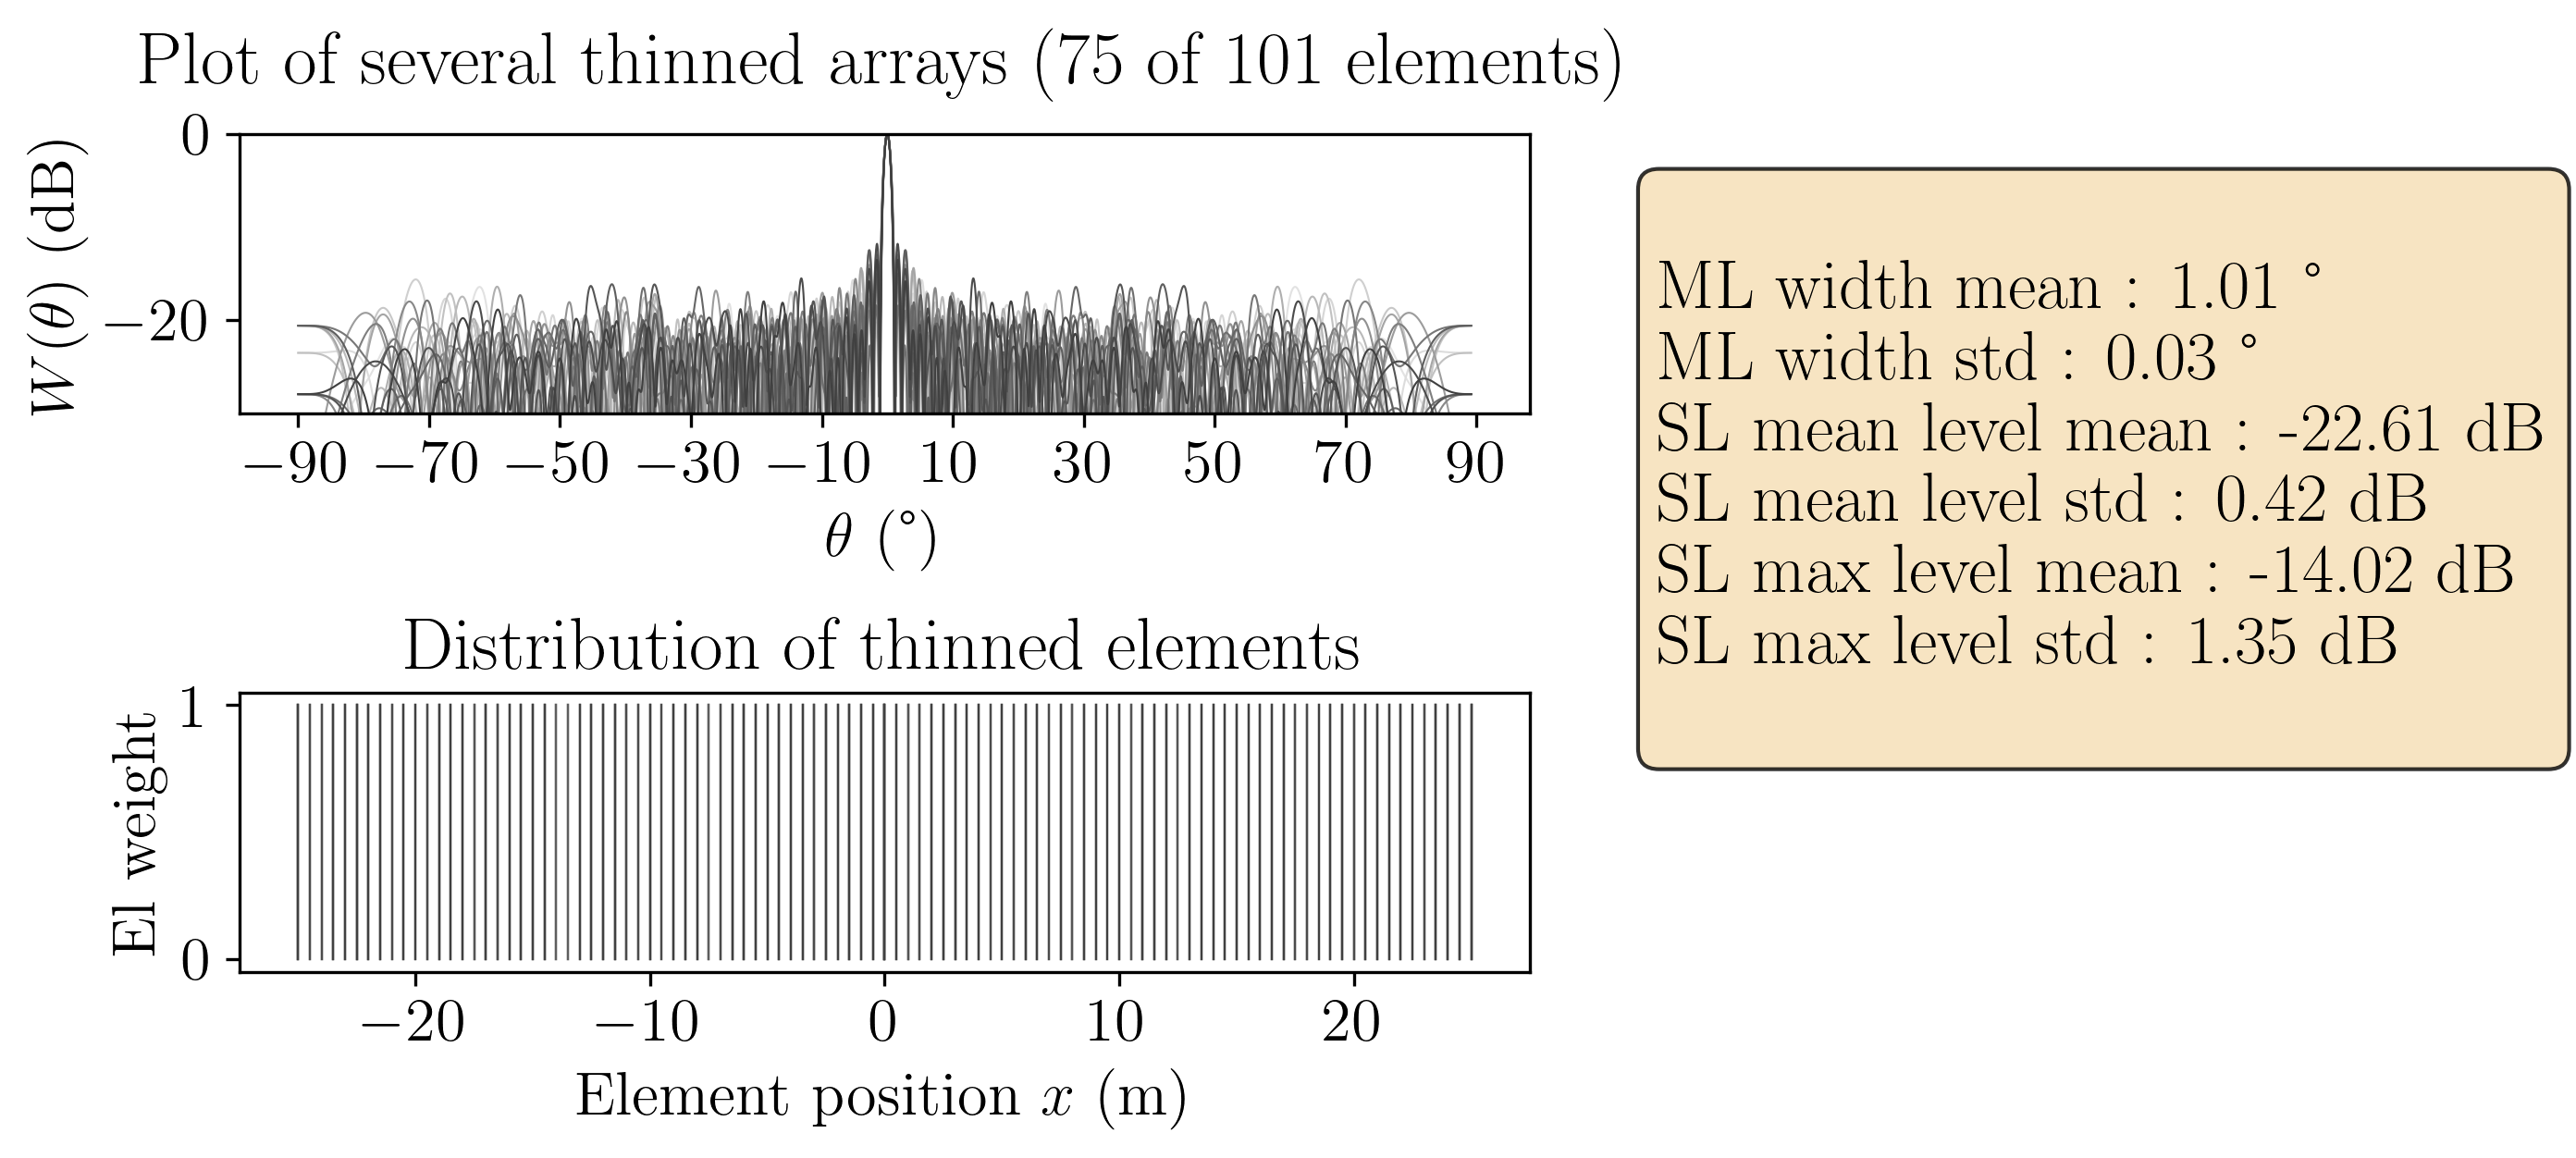

In [27]:
M = 101
NPos = 75
colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    ElPos = get_ElPos(NPos)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M),y=1.1)
ax2.set_title('Distribution of thinned elements')


textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)



fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_unif_array_pattern_'+str(NPos)+'.png',dpi=300)

In [28]:
print('Main lobe width')
ML_width_mean = np.mean(ML_widths_list)
ML_width_std = np.std(ML_widths_list)
print('Mean : {:.2f} °'.format(ML_width_mean))
print('Std : {:.2f} °'.format(ML_width_std))

print('Side lobes mean level')
SL_mean_level_mean = np.mean(SL_mean_levels_list)
SL_mean_level_std = np.std(SL_mean_levels_list)
print('Mean : {:.2f} dB'.format(SL_mean_level_mean))
print('Std : {:.2f} dB'.format(SL_mean_level_std))

print('Side lobes max level')
SL_max_level_mean = np.mean(SL_max_levels_list)
SL_max_level_std = np.std(SL_max_levels_list)
print('Mean : {:.2f} dB'.format(SL_max_level_mean))
print('Std : {:.2f} dB'.format(SL_max_level_std))



Main lobe width
Mean : 1.01 °
Std : 0.03 °
Side lobes mean level
Mean : -22.61 dB
Std : 0.42 dB
Side lobes max level
Mean : -14.02 dB
Std : 1.35 dB


## ULA with 101 elements

In [29]:
# Number of elements
M=101
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/2
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# Weigths vector
weights = np.ones(M)
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_
# Array pattern for d = λ/2
pattern = 20*np.log10(np.abs(array_pattern(positions,weights,k_values)/np.max(np.abs(array_pattern(positions,weights,k_values))))**2)

Text(0.02, 0.5, '$W(\\theta)$ (dB)')

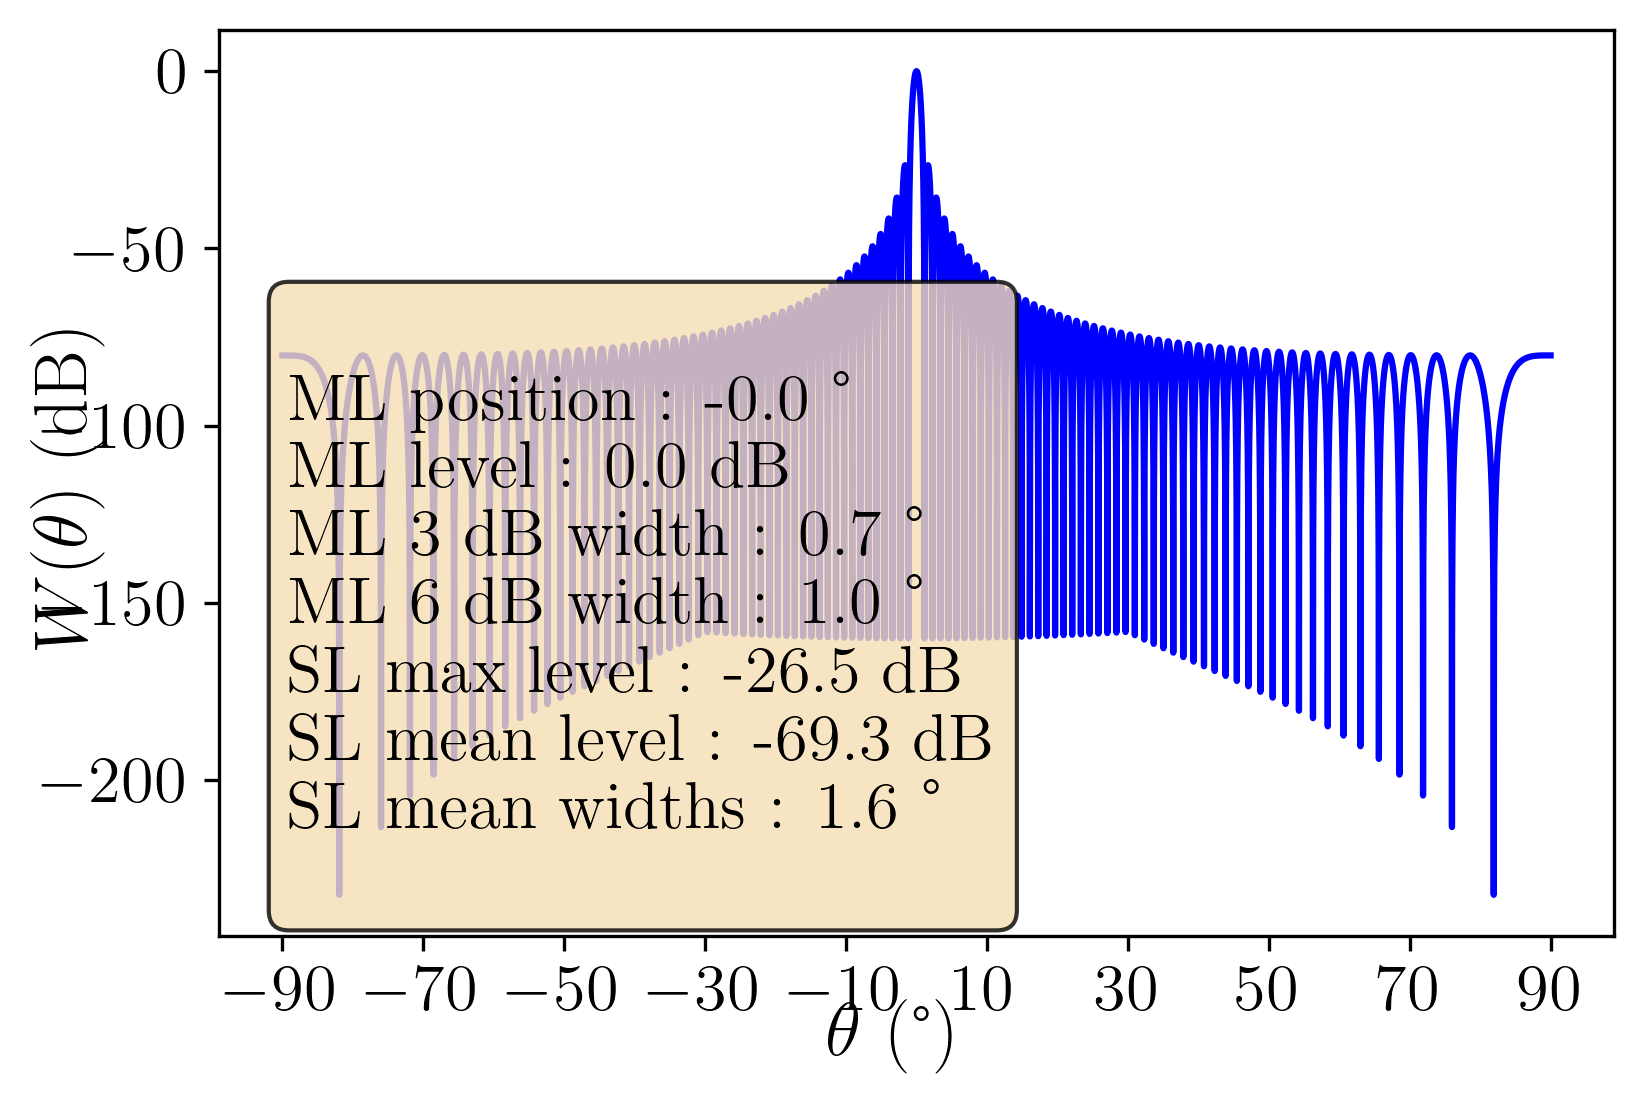

In [30]:
# Create four polar axes and access them through the returned array
fig, ax = plt.subplots(1)

params = get_lobes_positions(pattern,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)


ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,pattern,color='blue')

ax.set_xticks(np.arange(-90,110,20))
textstr = '''
ML position : {:.1f} °
ML level : {:.1f} dB
ML 3 dB width : {:.1f} °
ML 6 dB width : {:.1f} °
SL max level : {:.1f} dB
SL mean level : {:.1f} dB 
SL mean widths : {:.1f} °
'''.format(params['ML position'],params['ML level'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])



# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=16,
    verticalalignment='top', bbox=props)


fig.supxlabel('$\\theta$ (°)',fontsize=18)
fig.supylabel('$W(\\theta)$ (dB)',fontsize=18)
#fig.suptitle('ULA array pattern for different element spacings',fontsize=46)
#plt.savefig('images/array/ula_patterns.png',dpi=300)

## Arrays from "J. F. Hopperstad and S. Holm,"Optimization of sparse arrays by an improved simulated annealing algorithm", Proc. Int. Workshop on Sampling Theory and Applications, pp. 91-95, Loen, Norway, August 1999"

In [31]:
weights_fig3 = np.array([1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1])
weights_fig4 = np.array([1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
weights_fig5 = np.array([1,0,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])

In [32]:
# Number of elements
M=101
# Wavelength
lambda_ = 1#m
# Spacing
spacing = lambda_/2
# Elements positions vector
positions = np.arange(0,M,1)*spacing
# Weigths vector
weights = np.ones(M)
# K values vector
k_values = np.arange(-1,1+0.0001,0.0001)*2*np.pi/lambda_


pattern_fig3 = array_pattern(positions,weights_fig3,k_values)
pattern_fig3 = 20*np.log10(np.abs(pattern_fig3)/np.max(np.abs(pattern_fig3)))
pattern_fig4 = array_pattern(positions,weights_fig4,k_values)
pattern_fig4 = 20*np.log10(np.abs(pattern_fig4)/np.max(np.abs(pattern_fig4)))
pattern_fig5 = array_pattern(positions,weights_fig5,k_values)
pattern_fig5 = 20*np.log10(np.abs(pattern_fig5)/np.max(np.abs(pattern_fig5)))

## Array figure 3

Text(0.02, 0.5, '$W(\\theta)$ (dB)')

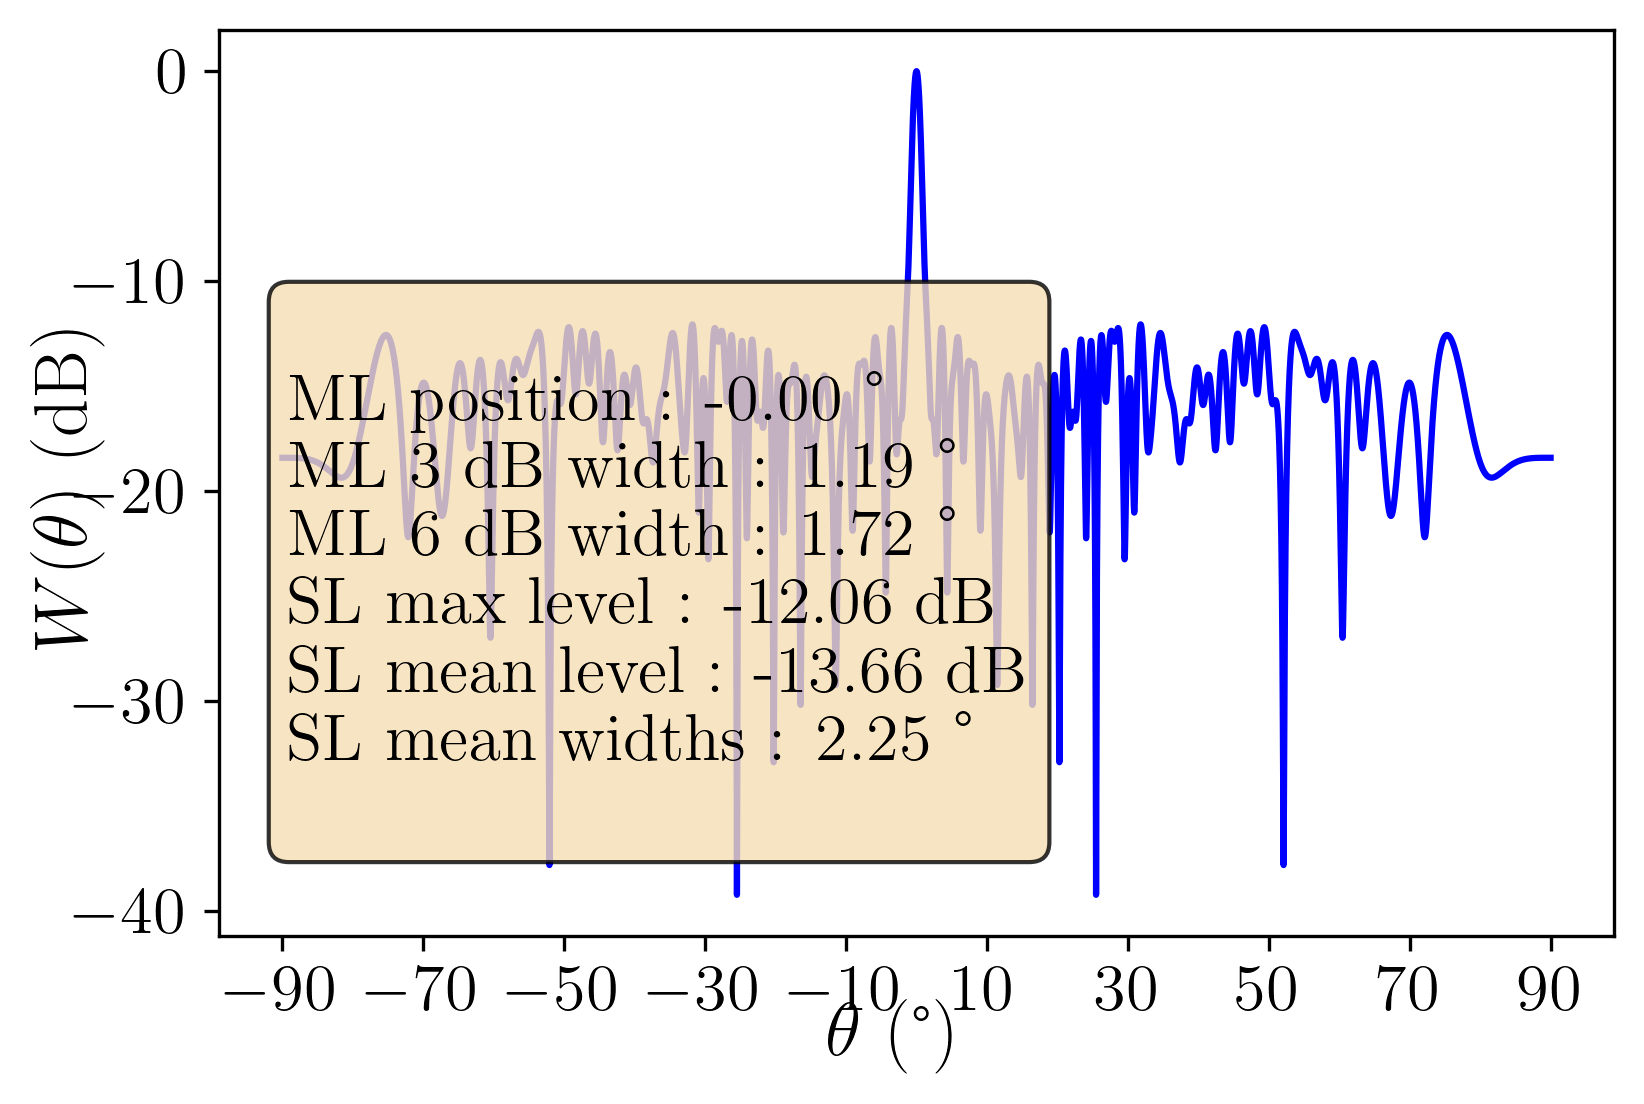

In [33]:


fig, ax = plt.subplots(1)

params = get_lobes_positions(pattern_fig3,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)


ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,pattern_fig3,color='blue')

ax.set_xticks(np.arange(-90,110,20))
textstr = '''
ML position : {:.2f} °
ML 3 dB width : {:.2f} °
ML 6 dB width : {:.2f} °
SL max level : {:.2f} dB
SL mean level : {:.2f} dB 
SL mean widths : {:.2f} °
'''.format(params['ML position'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])



# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=16,
    verticalalignment='top', bbox=props)
    


fig.supxlabel('$\\theta$ (°)',fontsize=18)
fig.supylabel('$W(\\theta)$ (dB)',fontsize=18)
#fig.suptitle('ULA array pattern for different element spacings',fontsize=46)
#plt.savefig('images/array/ula_patterns.png',dpi=300)




## Array figure 4

Text(0.02, 0.5, '$W(\\theta)$ (dB)')

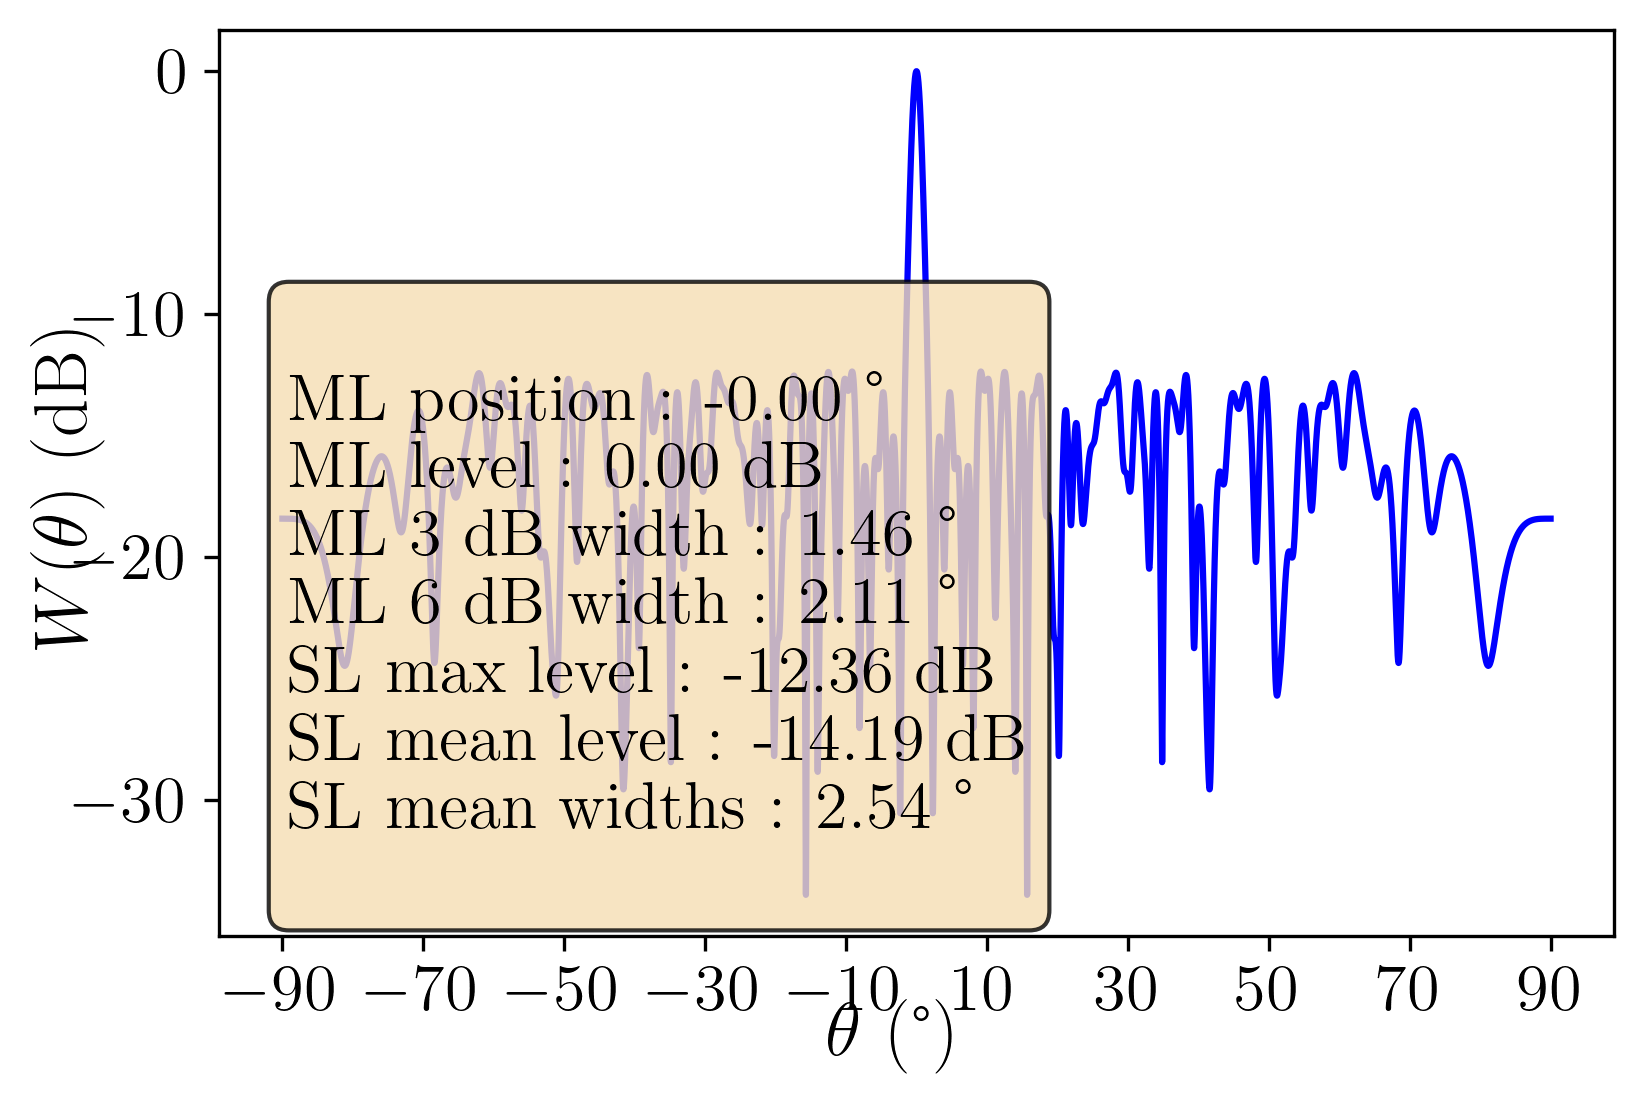

In [34]:


fig, ax = plt.subplots(1)

params = get_lobes_positions(pattern_fig4,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)


ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,pattern_fig4,color='blue')

ax.set_xticks(np.arange(-90,110,20))
textstr = '''
ML position : {:.2f} °
ML level : {:.2f} dB
ML 3 dB width : {:.2f} °
ML 6 dB width : {:.2f} °
SL max level : {:.2f} dB
SL mean level : {:.2f} dB 
SL mean widths : {:.2f} °
'''.format(params['ML position'],params['ML level'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])



# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=16,
    verticalalignment='top', bbox=props)
    


fig.supxlabel('$\\theta$ (°)',fontsize=18)
fig.supylabel('$W(\\theta)$ (dB)',fontsize=18)
#fig.suptitle('ULA array pattern for different element spacings',fontsize=46)
#plt.savefig('images/array/ula_patterns.png',dpi=300)





## Array figure 5

Text(0.02, 0.5, '$W(\\theta)$ (dB)')

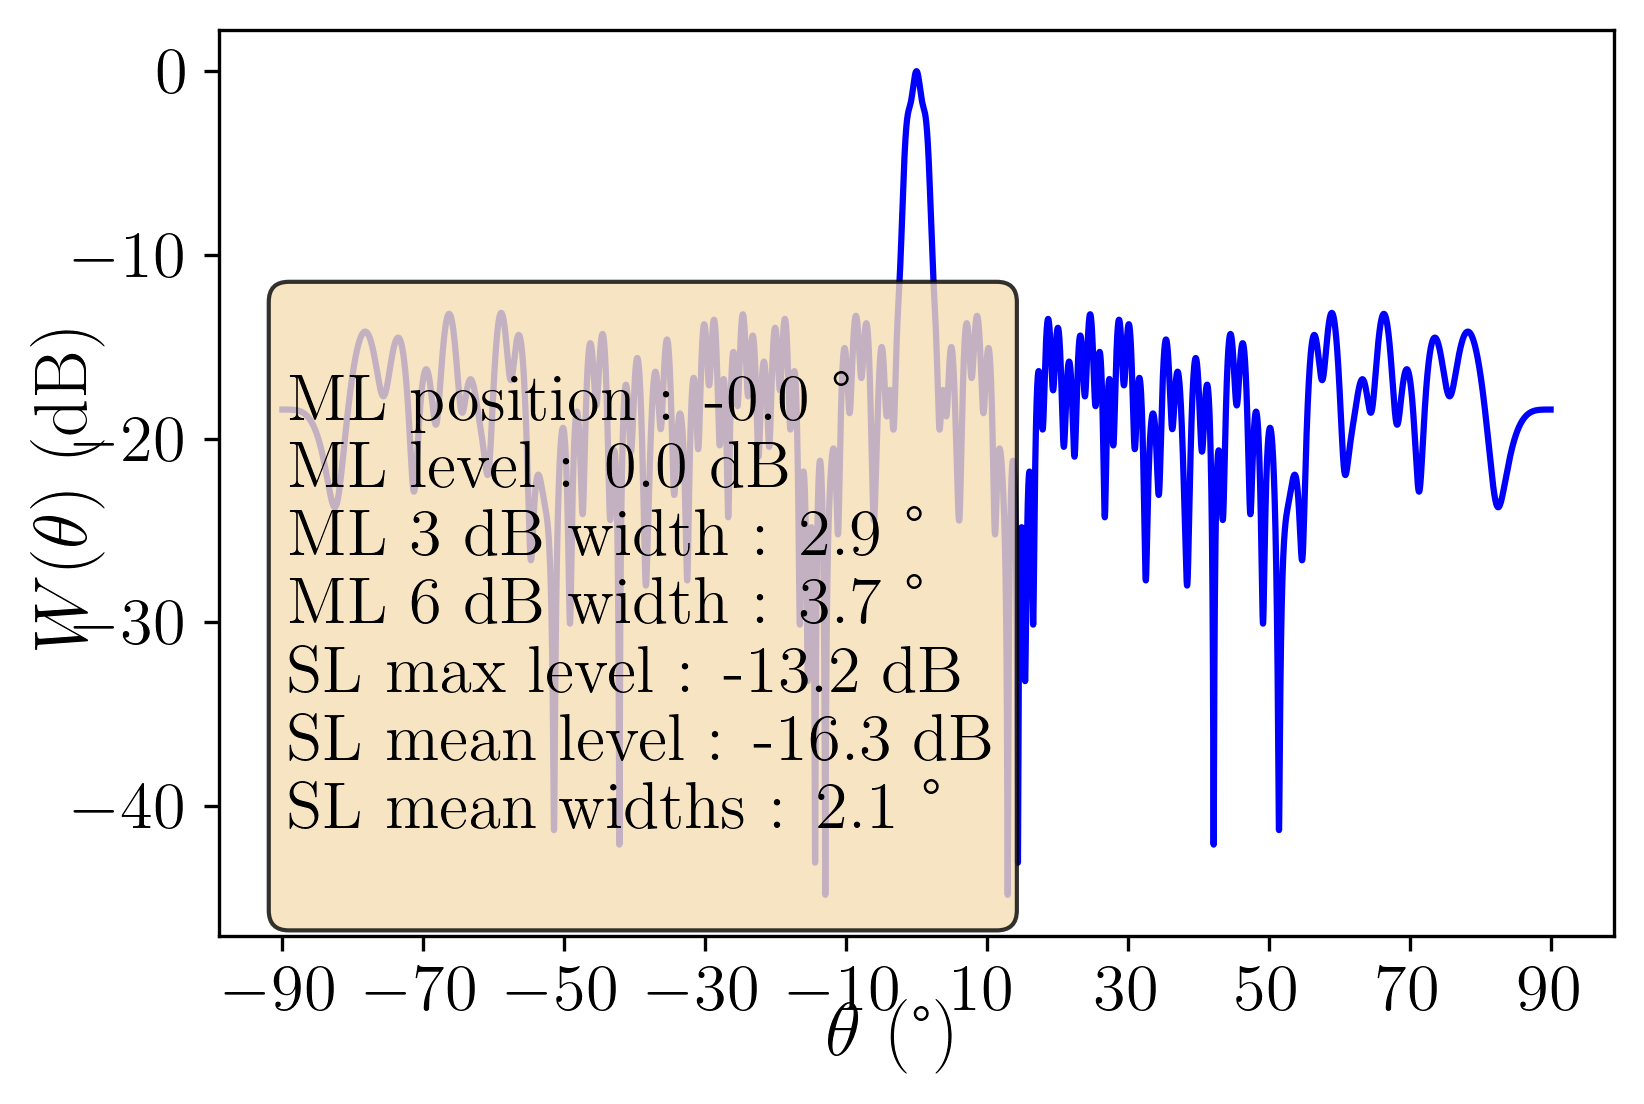

In [35]:


fig, ax = plt.subplots(1)

params = get_lobes_positions(pattern_fig5,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)


ax.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,pattern_fig5,color='blue')

ax.set_xticks(np.arange(-90,110,20))
textstr = '''
ML position : {:.1f} °
ML level : {:.1f} dB
ML 3 dB width : {:.1f} °
ML 6 dB width : {:.1f} °
SL max level : {:.1f} dB
SL mean level : {:.1f} dB 
SL mean widths : {:.1f} °
'''.format(params['ML position'],params['ML level'],params['ML 3 dB width'],params['ML 6 dB width'],params['SL max level'],params['SL mean level'],params['SL mean widths'])



# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax.text(0.05, 0.7, textstr, transform=ax.transAxes, fontsize=16,
    verticalalignment='top', bbox=props)
    


fig.supxlabel('$\\theta$ (°)',fontsize=18)
fig.supylabel('$W(\\theta)$ (dB)',fontsize=18)
#fig.suptitle('ULA array pattern for different element spacings',fontsize=46)
#plt.savefig('images/array/ula_patterns.png',dpi=300)





## 10.

Redo the analysis performed in 6), but let the element positions be drawn from a Normal distribution. You should try several values of the standard deviation (for instant 8 elements and 16 elements). How does this change the array performance?

## 25 active elements (std=16.83)

100%|██████████| 100/100 [00:07<00:00, 14.09it/s]


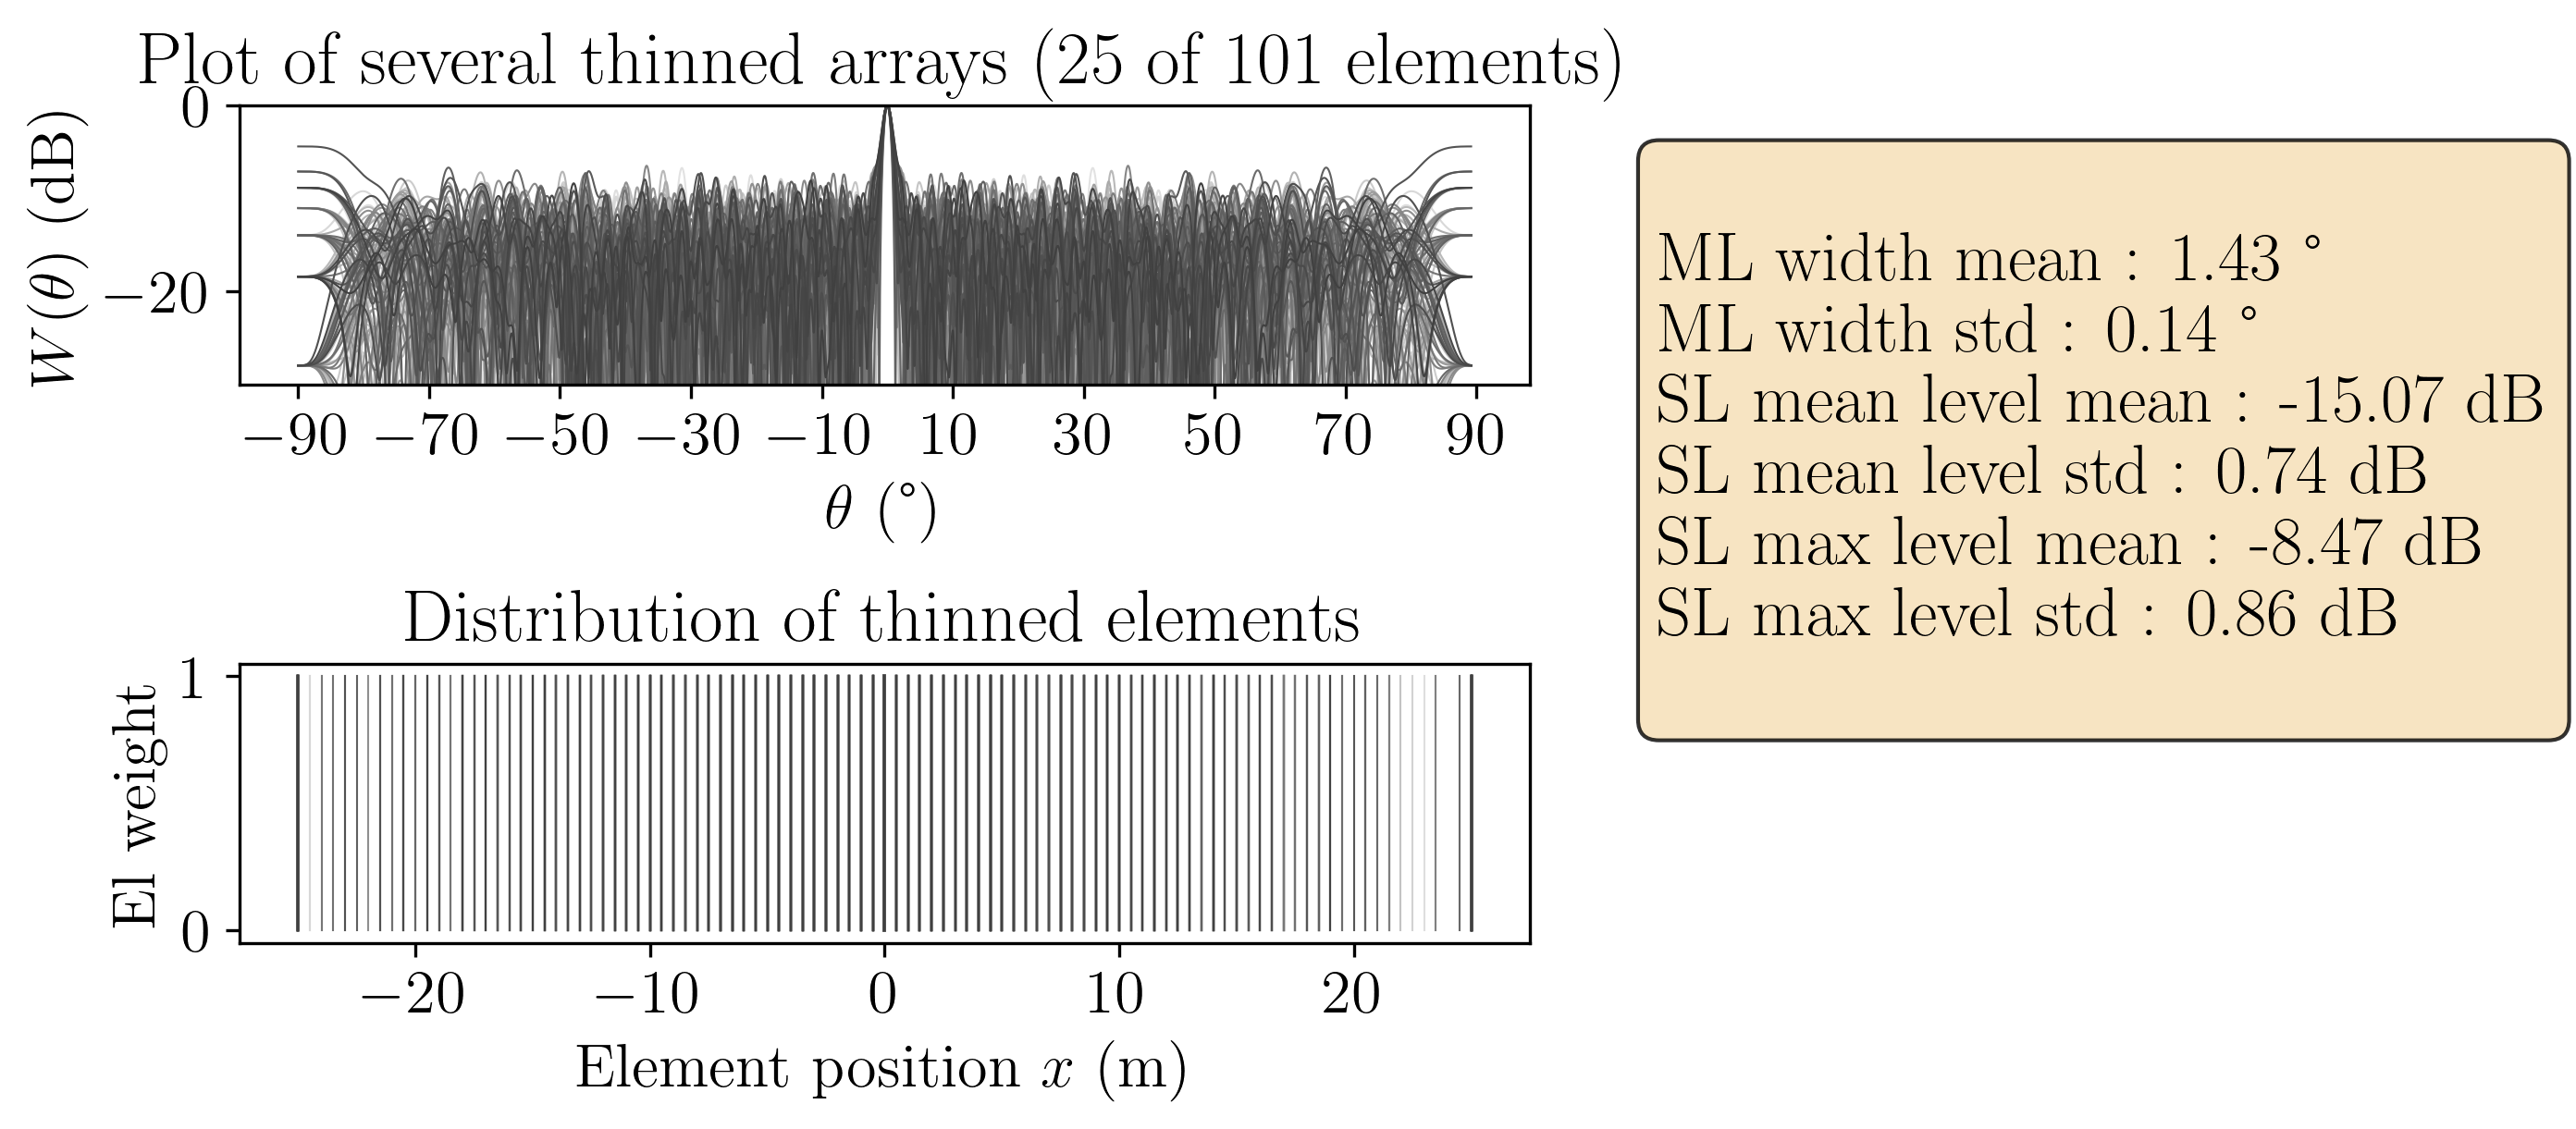

In [36]:
N = 100
M = 101
NPos = 25
factor = 6

colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    
    ElPos = get_ElPos_normal(NPos,factor)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M))
ax2.set_title('Distribution of thinned elements')

textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)
fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_gaussian_array_pattern_'+str(NPos)+'std_'+str(factor)+'.png',dpi=300)

## 50 active elements (std=16.83)

100%|██████████| 100/100 [00:13<00:00,  7.19it/s]


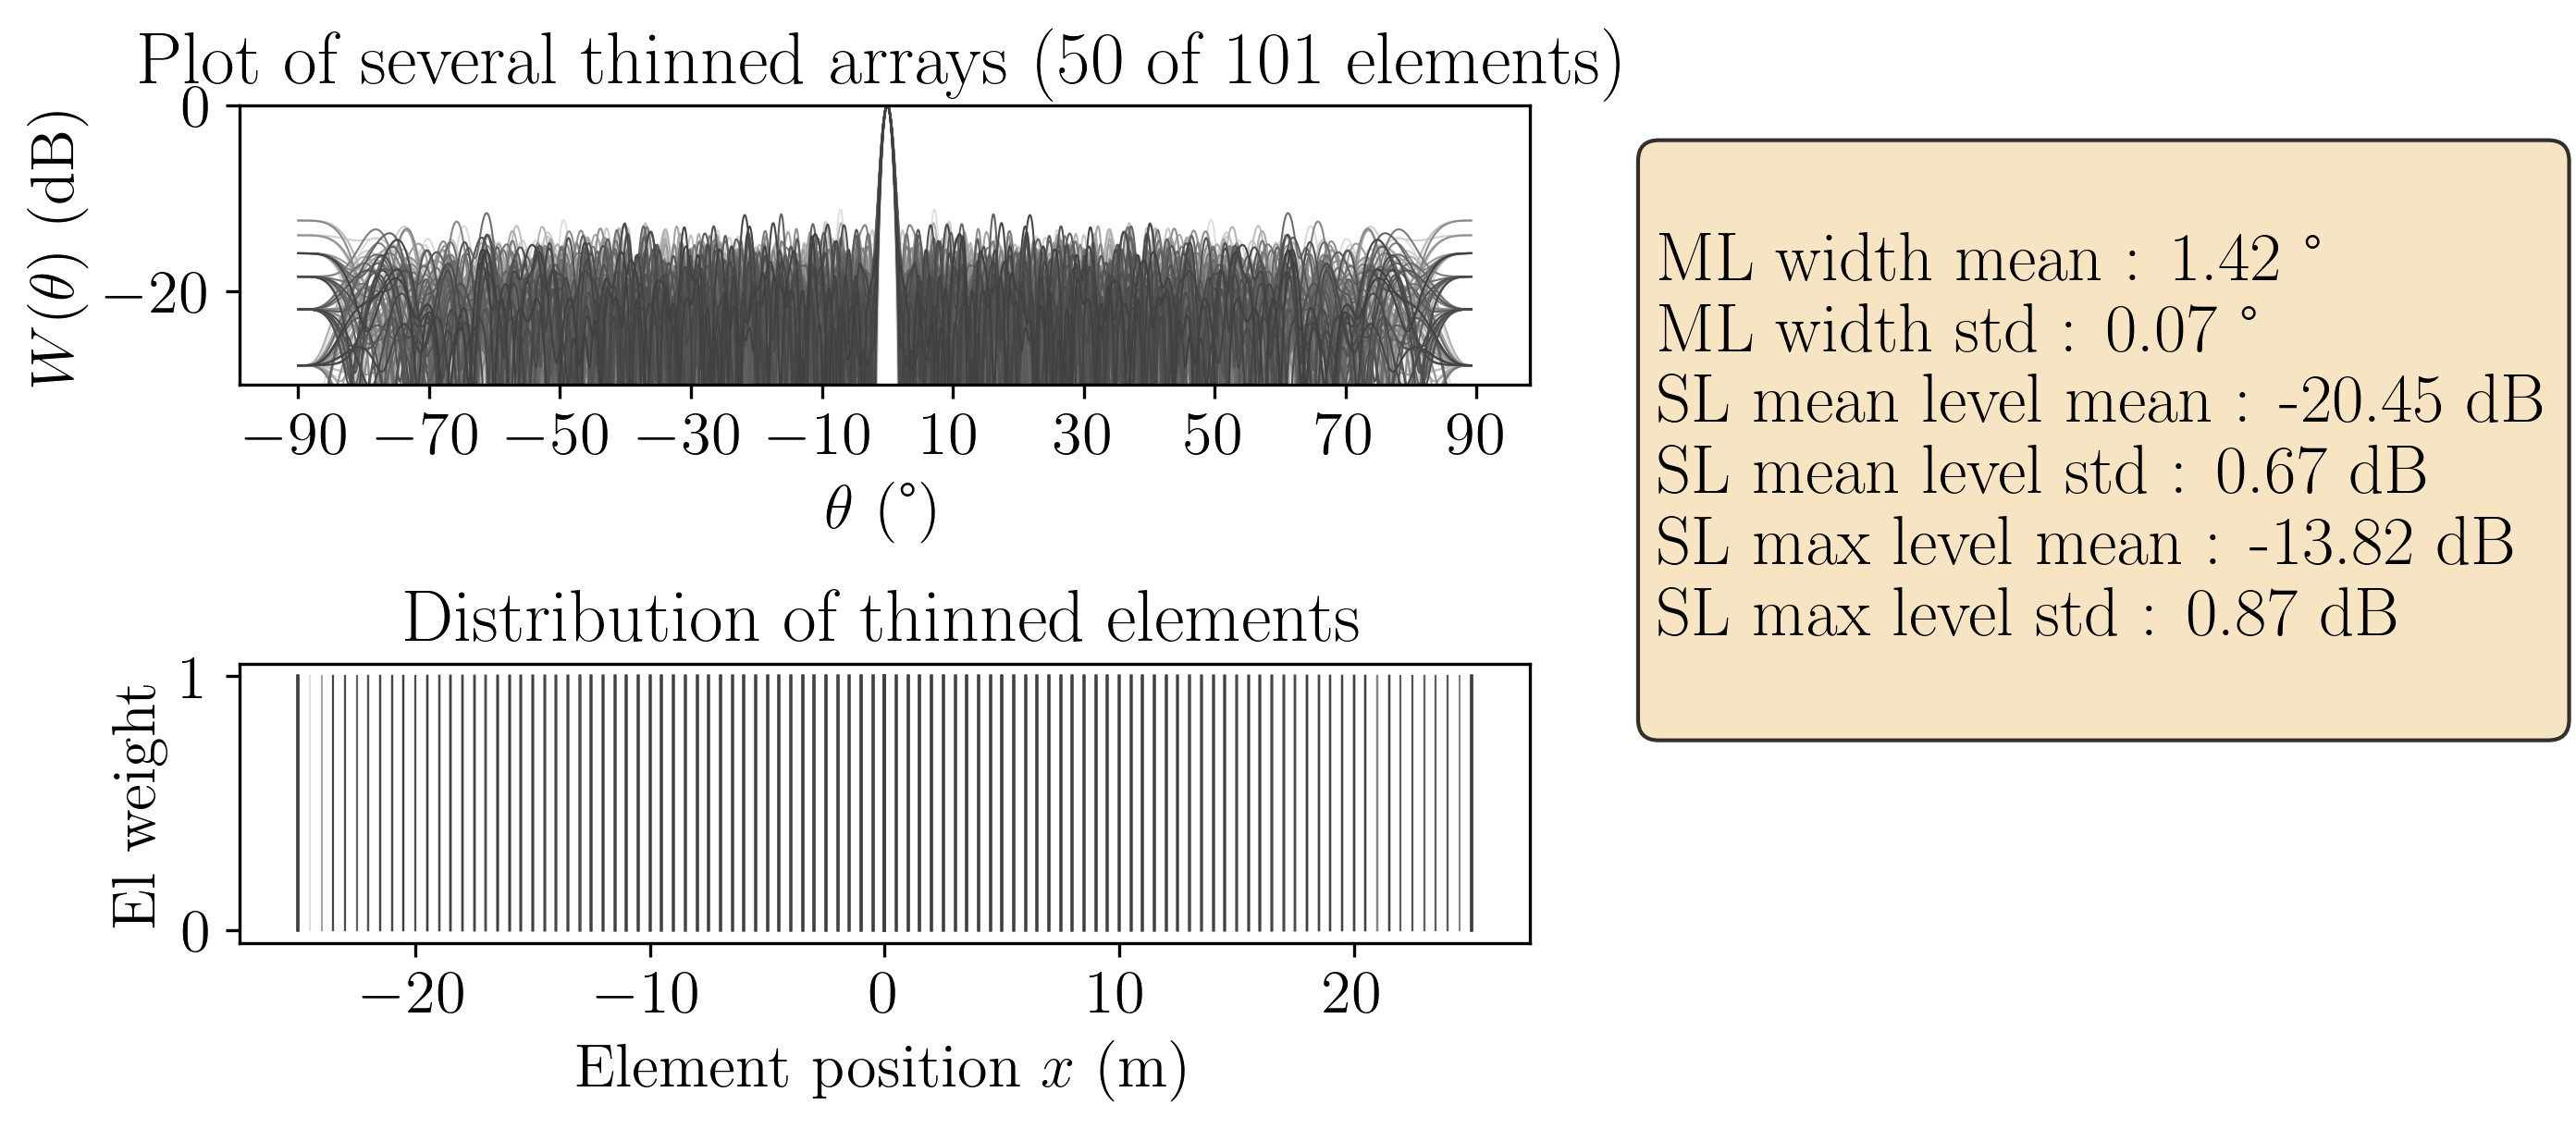

In [37]:
N = 100
M = 101
NPos = 50
factor = 6

colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    
    ElPos = get_ElPos_normal(NPos,factor)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M))
ax2.set_title('Distribution of thinned elements')

textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)

fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_gaussian_array_pattern_'+str(NPos)+'std_'+str(factor)+'.png',dpi=300)

## 75 active elements (std=16.83)

100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


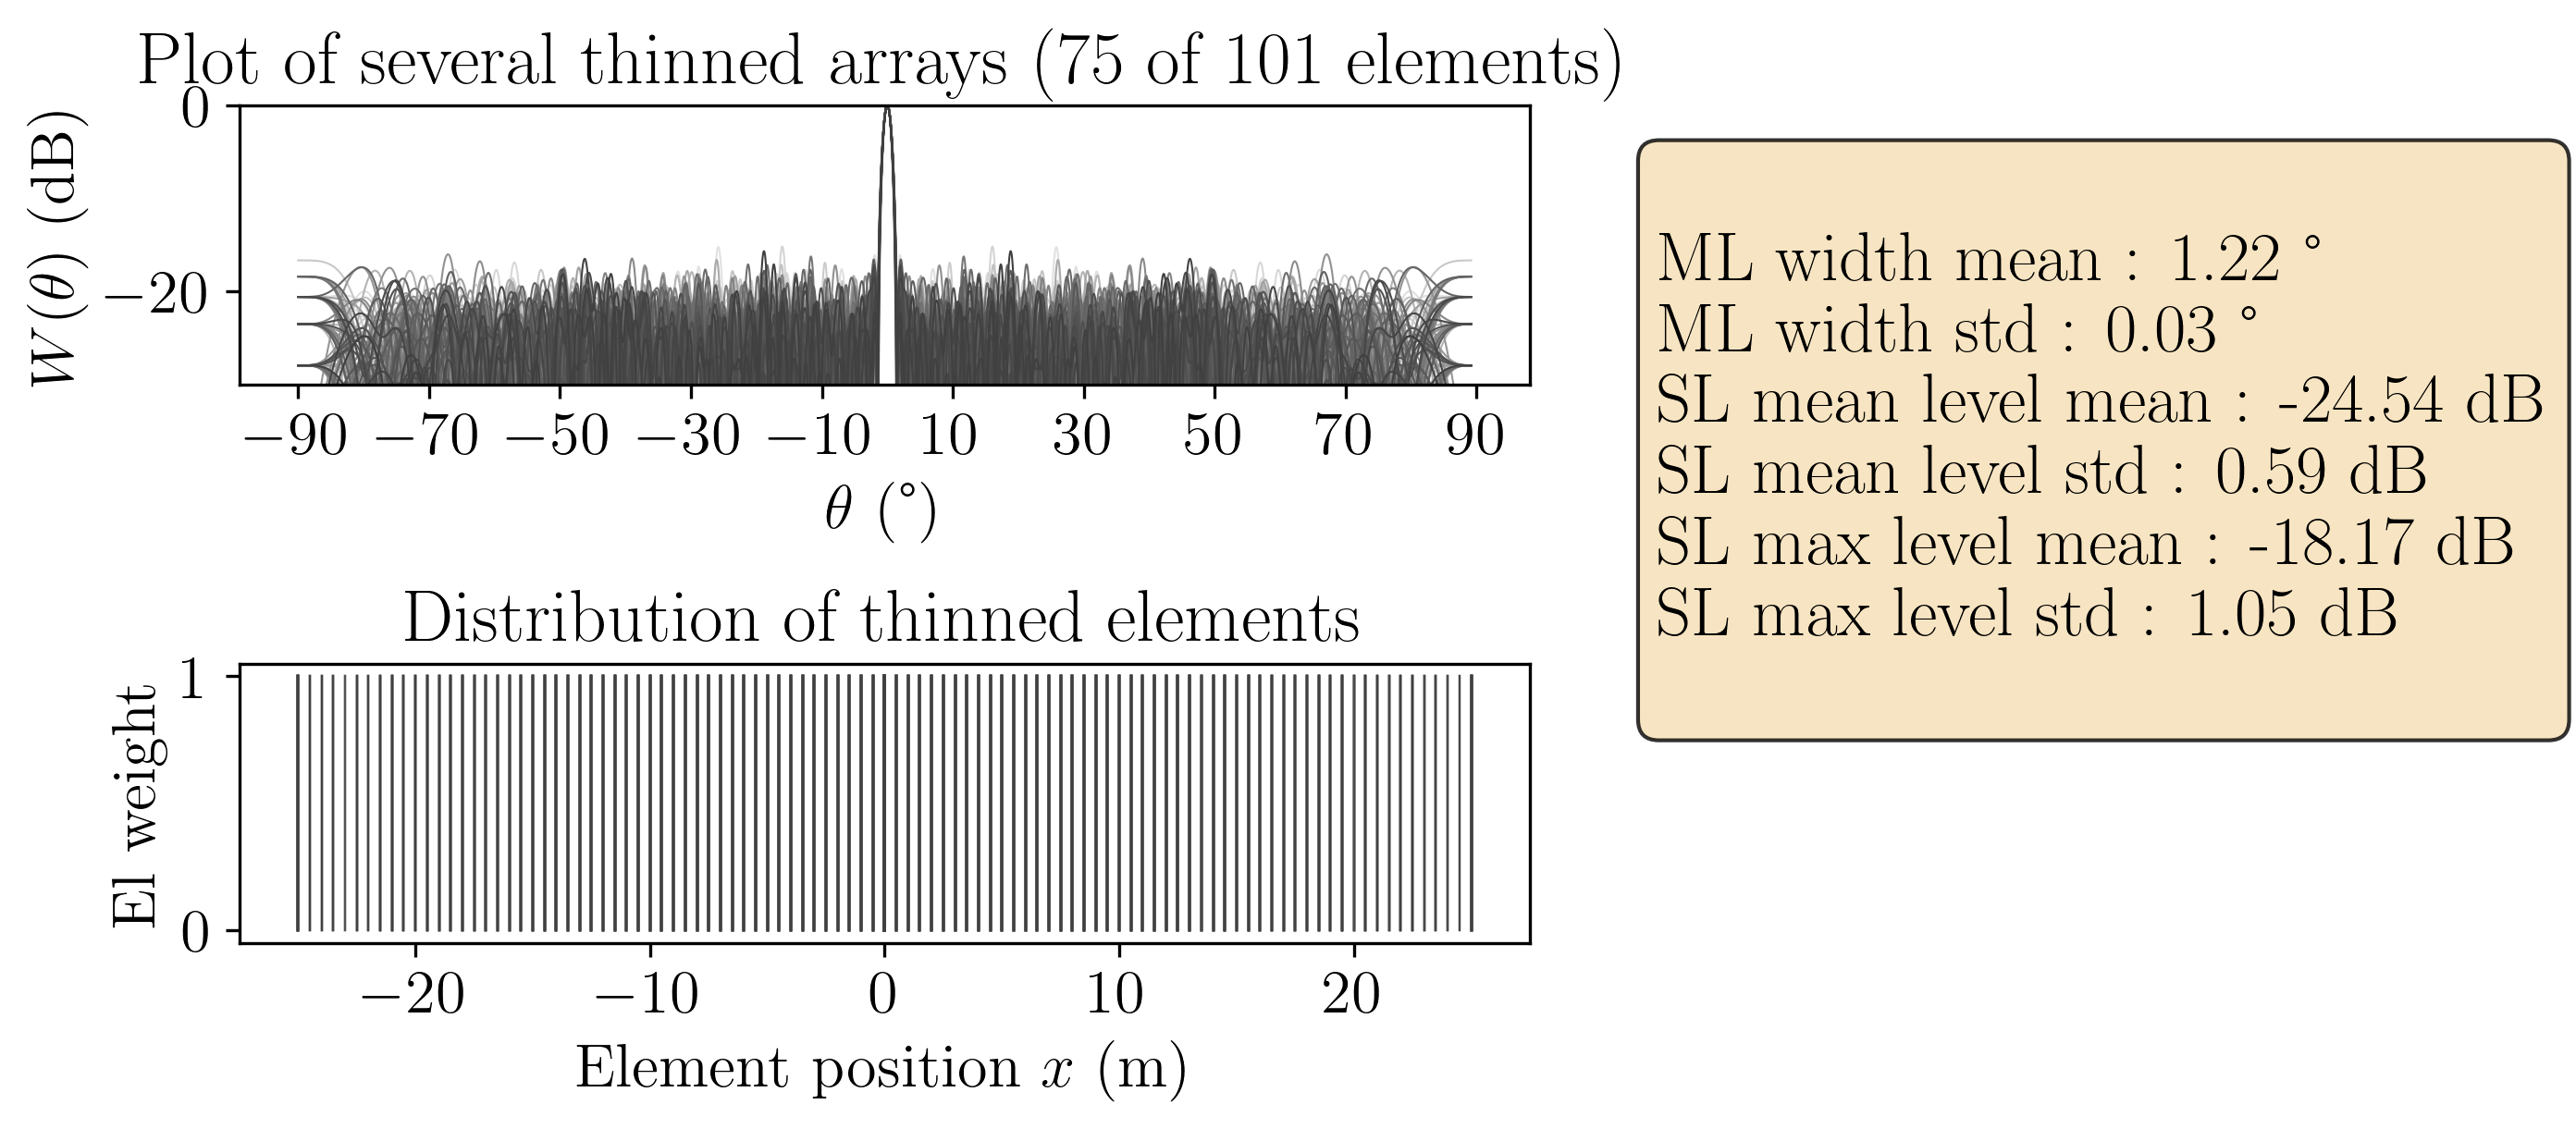

In [38]:
N = 100
M = 101
NPos = 75
factor = 6

colors = pl.cm.Greys(np.linspace(0.2,0.8,N))
lambda_ = 1#m
spacing = lambda_/2
positions = np.arange(0,M,1)*spacing
weights = np.ones(NPos)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)

ax1,ax2 = axs.flat

for i in tqdm(range(N)) : 
    
    
    ElPos = get_ElPos_normal(NPos,factor)
    
    pattern = np.abs(array_pattern(ElPos,weights,k_values))/np.max(np.abs(array_pattern(ElPos,weights,k_values)))     

    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,10*np.log10(pattern**2),color=colors[i],linewidth=0.5)
    ax1.set_xticks(np.arange(-90,110,20))
    
    ax2.plot([ElPos,ElPos],[np.zeros(len(ElPos)),np.ones(len(ElPos))],color=colors[i],linewidth=0.5)
    
    params = get_lobes_positions(10*np.log10(pattern**2),np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    
    

ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('El weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several thinned arrays ({} of {} elements)'.format(NPos,M))
ax2.set_title('Distribution of thinned elements')

textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.8, textstr, transform=ax1.transAxes, fontsize=18,verticalalignment='top', bbox=props)
fig.subplots_adjust(hspace=1)
plt.savefig('images/array/thinned_gaussian_array_pattern_'+str(NPos)+'std_'+str(factor)+'.png',dpi=300)

## 11.

Again, redo the analysis performed in 6), but this time design a binned sparse array (as described in Holm et. al, "Sampling theory and practice", Chapter 19 available at https://www.researchgate.net/publication/266499627_Sparse_Sampling_in_Array_Processing). How does this change the array performance?

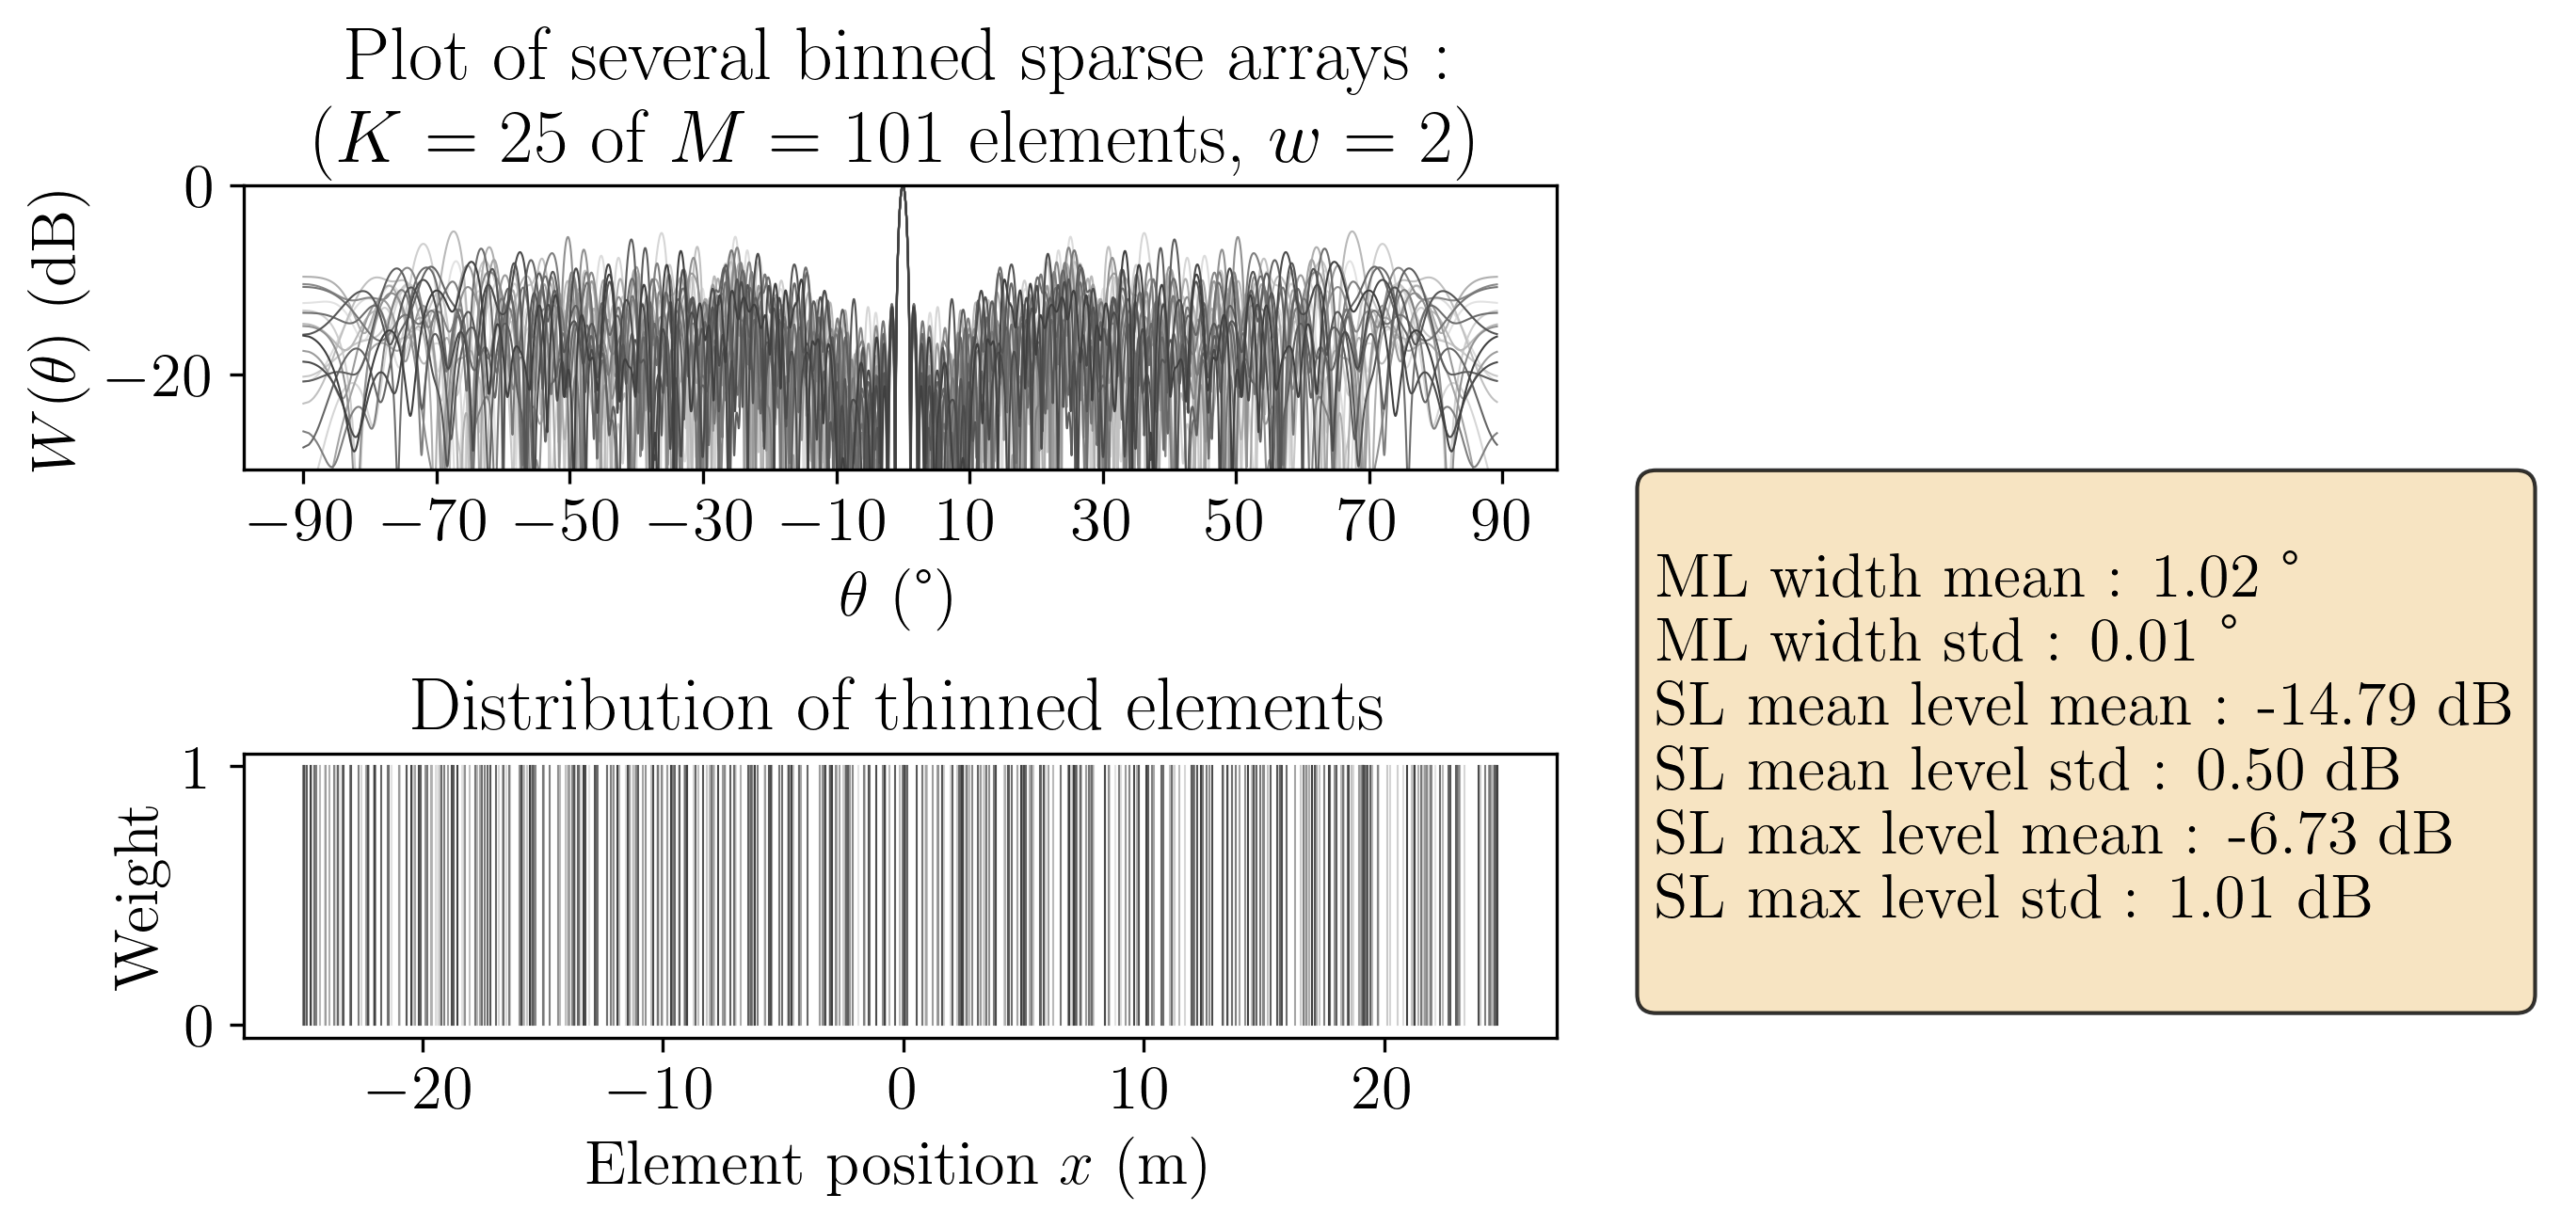

In [48]:
ML_widths_list = []
SL_mean_levels_list = []
SL_max_levels_list = []

fig, axs = plt.subplots(2)
ax1,ax2 = axs.flat

M = 101
K = 25
lambda_ = 1
spacing = lambda_/2
L = spacing*(M-1)
w = 2
weights = np.ones(K)
k_values = np.arange(-1,1,0.0001)*2*np.pi/lambda_

colors = pl.cm.Greys(np.linspace(0.2,0.8,20))

for i in range(20):

    pos = np.squeeze(np.array([-L/2 + m*w + np.random.uniform(0,w,1) for m in range(K)]))
    binned_sparse_pattern = array_pattern(pos,weights,k_values)
    binned_sparse_pattern = 20*np.log10(np.abs(binned_sparse_pattern)/np.max(np.abs(binned_sparse_pattern)))
    ax1.plot(np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi,binned_sparse_pattern,color=colors[i],linewidth=0.5)

    params = get_lobes_positions(binned_sparse_pattern,np.arcsin(k_values*lambda_/(2*np.pi))*180/np.pi)
    
    ML_widths_list.append(params['ML 3 dB width'])
    SL_mean_levels_list.append(params['SL mean level'])
    SL_max_levels_list.append(params['SL max level'])
    

    ax1.set_xticks(np.arange(-90,110,20))
    
    
    ax2.plot([pos,pos],[np.zeros(len(pos)),np.ones(len(pos))],color=colors[i],linewidth=0.5)
    
textstr = ''' 
    ML width mean : {:.2f} °
    ML width std : {:.2f} °
    SL mean level mean : {:.2f} dB
    SL mean level std : {:.2f} dB
    SL max level mean : {:.2f} dB
    SL max level std : {:.2f} dB
    '''.format(np.mean(ML_widths_list),np.std(ML_widths_list),np.mean(SL_mean_levels_list),np.std(SL_mean_levels_list),np.mean(SL_max_levels_list),np.std(SL_max_levels_list))
    


# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# place a text box in upper left in axes coords
ax1.text(1.1, 0.7, textstr, transform=ax.transAxes, fontsize=16,
    verticalalignment='top', bbox=props)
    


ax1.set_ylim([-30,0])
ax1.set_xlabel('$\\theta$ (°)')
ax1.set_ylabel('$W(\\theta)$ (dB)')
ax2.set_ylabel('Weight')
ax2.set_xlabel('Element position $x$ (m)')
ax1.set_title('Plot of several binned sparse arrays :\n($K={}$ of $M={}$ elements, $w={}$)'.format(K,M,w))
ax2.set_title('Distribution of thinned elements')
fig.subplots_adjust(hspace=1)
#fig.supxlabel('$\\theta$ (°)',fontsize=18,y=-0.01)
#fig.supylabel('$W(\\theta)$ (dB)',fontsize=18,x=-0.01)
#fig.suptitle('Binned spare array, $M=101$, $K=25$, $d=\\frac{\\lambda}{2}$ and $w=2$',fontsize=18)
#plt.savefig('images/array/ula_patterns.png',dpi=300)

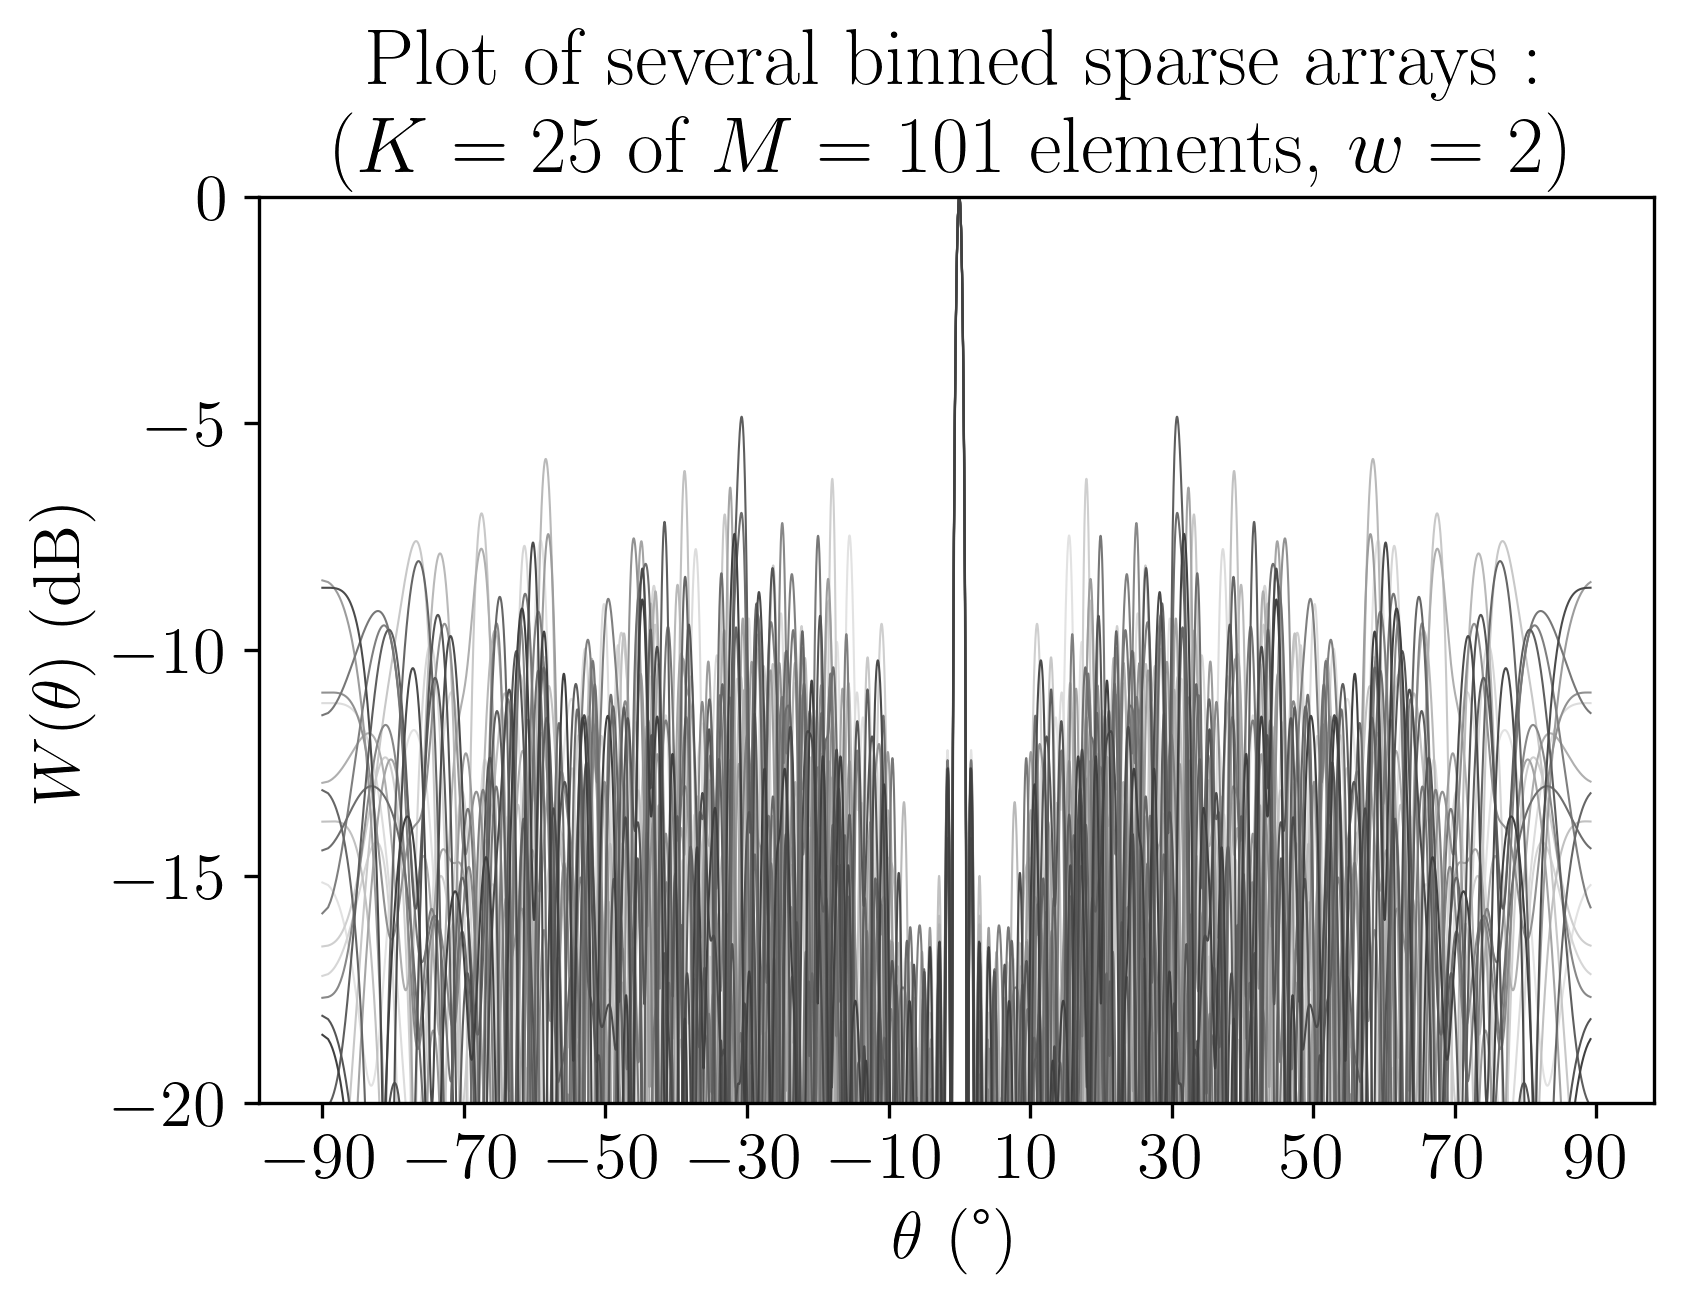